<a href="https://colab.research.google.com/github/mathu3004/Pearl_Path/blob/main/FinalizedRestaurantsPreprocessed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the csv file
file_path = '/content/drive/My Drive/Colombo/RestaurantsColombo.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the data
print("Shape of the dataset:", df.shape)
print("\nFirst 5 rows:")
df.head()

Shape of the dataset: (298, 319)

First 5 rows:


,address,addressObj/city,addressObj/country,addressObj/postalcode,addressObj/street1,addressObj/street2,ancestorLocations/0/id,ancestorLocations/0/name,ancestorLocations/0/subcategory,ancestorLocations/1/id,...,reviewTags/27/text,reviewTags/28/reviews,reviewTags/28/text,reviewTags/29/reviews,reviewTags/29/text,subcategories/0,travelerChoiceAward,type,webUrl,website
0,"57 Ward Place Roof Top, Jetwing Colombo Seven,...",Colombo,Sri Lanka,700.0,57 Ward Place,"Roof Top, Jetwing Colombo Seven",293962,Colombo,City,2467812,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RESTAURANT,https://www.tripadvisor.com/Restaurant_Review-...,https://www.jetwinghotels.com/jetwingcolombose...
1,"2 Galle Road, Colombo 00300 Sri Lanka",Colombo,Sri Lanka,300.0,2 Galle Road,NaN,293962,Colombo,City,2467812,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RESTAURANT,https://www.tripadvisor.com/Restaurant_Review-...,https://www.facebook.com/1864restaurant/
2,"106 Thimbirigasyaya Road, Colombo 00500 Sri Lanka",Colombo,Sri Lanka,500.0,106 Thimbirigasyaya Road,NaN,293962,Colombo,City,2467812,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RESTAURANT,https://www.tripadvisor.com/Restaurant_Review-...,http://www.facebook.com/bubblemebubbletea
3,"10 Galle Face Drive, Colombo 00300 Sri Lanka",Colombo,Sri Lanka,300.0,10 Galle Face Drive,NaN,293962,Colombo,City,2467812,...,NaN,NaN,NaN,NaN,NaN,Sit down,NaN,RESTAURANT,https://www.tripadvisor.com/Restaurant_Review-...,http://barracuda.lk
4,"590 Colombo - Galle Main Road Marino Mall, Col...",Colombo,Sri Lanka,NaN,590 Colombo - Galle Main Road,Marino Mall,293962,Colombo,City,2467812,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RESTAURANT,https://www.tripadvisor.com/Restaurant_Review-...,NaN


In [ ]:
print("\nData Types and Non-null Counts:")
display(df.info())


Data Types and Non-null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Columns: 319 entries, address to website
dtypes: bool(4), float64(95), int64(13), object(207)
memory usage: 734.7+ KB


None

In [ ]:
print("\nStatistical Summary of Numeric Columns:")
display(df.describe())


Statistical Summary of Numeric Columns:


,addressObj/postalcode,ancestorLocations/0/id,ancestorLocations/1/id,ancestorLocations/2/id,ancestorLocations/3/id,establishmentTypes/2,hours,hours/weekRanges/0/0/close,hours/weekRanges/0/0/open,hours/weekRanges/0/1/close,...,reviewTags/20/reviews,reviewTags/21/reviews,reviewTags/22/reviews,reviewTags/23/reviews,reviewTags/24/reviews,reviewTags/25/reviews,reviewTags/26/reviews,reviewTags/27/reviews,reviewTags/28/reviews,reviewTags/29/reviews
count,241.000000,2.980000e+02,2.980000e+02,2.980000e+02,5.0,0.0,0.0,224.000000,224.000000,44.000000,...,21.000000,20.000000,18.000000,15.000000,13.000000,13.000000,11.000000,9.000000,7.000000,6.000000
mean,3882.929461,1.042840e+06,2.434780e+06,3.304350e+05,293961.0,NaN,NaN,1285.129464,632.343750,1337.045455,...,19.095238,23.350000,11.611111,11.600000,12.692308,9.076923,7.909091,8.000000,6.428571,5.333333
std,10082.423660,2.692543e+06,2.532907e+05,2.796805e+05,0.0,NaN,NaN,231.939543,216.965358,128.122934,...,27.662076,43.429647,12.005581,11.031125,11.621708,8.371196,7.133786,6.873864,5.711309,2.338090
min,1.000000,2.939620e+05,4.990790e+05,2.939610e+05,293961.0,NaN,NaN,600.000000,0.000000,870.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,200.000000,2.939620e+05,2.467812e+06,2.939610e+05,293961.0,NaN,NaN,1293.750000,540.000000,1346.250000,...,4.000000,4.750000,5.500000,3.000000,2.000000,4.000000,3.000000,2.000000,2.000000,4.250000
50%,300.000000,2.939620e+05,2.467812e+06,2.939610e+05,293961.0,NaN,NaN,1380.000000,660.000000,1380.000000,...,9.000000,8.000000,9.000000,5.000000,7.000000,4.000000,4.000000,7.000000,3.000000,5.000000
75%,1000.000000,2.939620e+05,2.467812e+06,2.939610e+05,293961.0,NaN,NaN,1425.000000,720.000000,1380.000000,...,22.000000,13.250000,11.750000,18.000000,21.000000,17.000000,12.500000,13.000000,10.000000,7.250000
max,91311.000000,1.674078e+07,2.467812e+06,2.467812e+06,293961.0,NaN,NaN,2040.000000,1140.000000,1440.000000,...,113.000000,190.000000,53.000000,34.000000,36.000000,23.000000,24.000000,21.000000,16.000000,8.000000


In [ ]:
print("\nMissing Values in Each Column:")
display(df.isnull().sum())


Missing Values in Each Column:


,0
address,0
addressObj/city,0
addressObj/country,0
addressObj/postalcode,57
addressObj/street1,4
...,...
subcategories/0,105
travelerChoiceAward,296
type,0
webUrl,0


In [ ]:
# Check for duplicates
print("\nNumber of Duplicate Rows:", df.duplicated().sum())


Number of Duplicate Rows: 0


In [ ]:
# Column-wise unique values
print("\nUnique values in each column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")


Unique values in each column:
address: 289 unique values
addressObj/city: 19 unique values
addressObj/country: 1 unique values
addressObj/postalcode: 40 unique values
addressObj/street1: 271 unique values
addressObj/street2: 120 unique values
ancestorLocations/0/id: 19 unique values
ancestorLocations/0/name: 19 unique values
ancestorLocations/0/subcategory: 2 unique values
ancestorLocations/1/id: 2 unique values
ancestorLocations/1/name: 2 unique values
ancestorLocations/1/subcategory: 2 unique values
ancestorLocations/2/id: 2 unique values
ancestorLocations/2/name: 2 unique values
ancestorLocations/2/subcategory: 2 unique values
ancestorLocations/3/id: 1 unique values
ancestorLocations/3/name: 1 unique values
ancestorLocations/3/subcategory: 1 unique values
category: 1 unique values
cuisines/0: 27 unique values
cuisines/1: 37 unique values
cuisines/2: 34 unique values
cuisines/3: 36 unique values
cuisines/4: 25 unique values
cuisines/5: 14 unique values
cuisines/6: 4 unique values
de

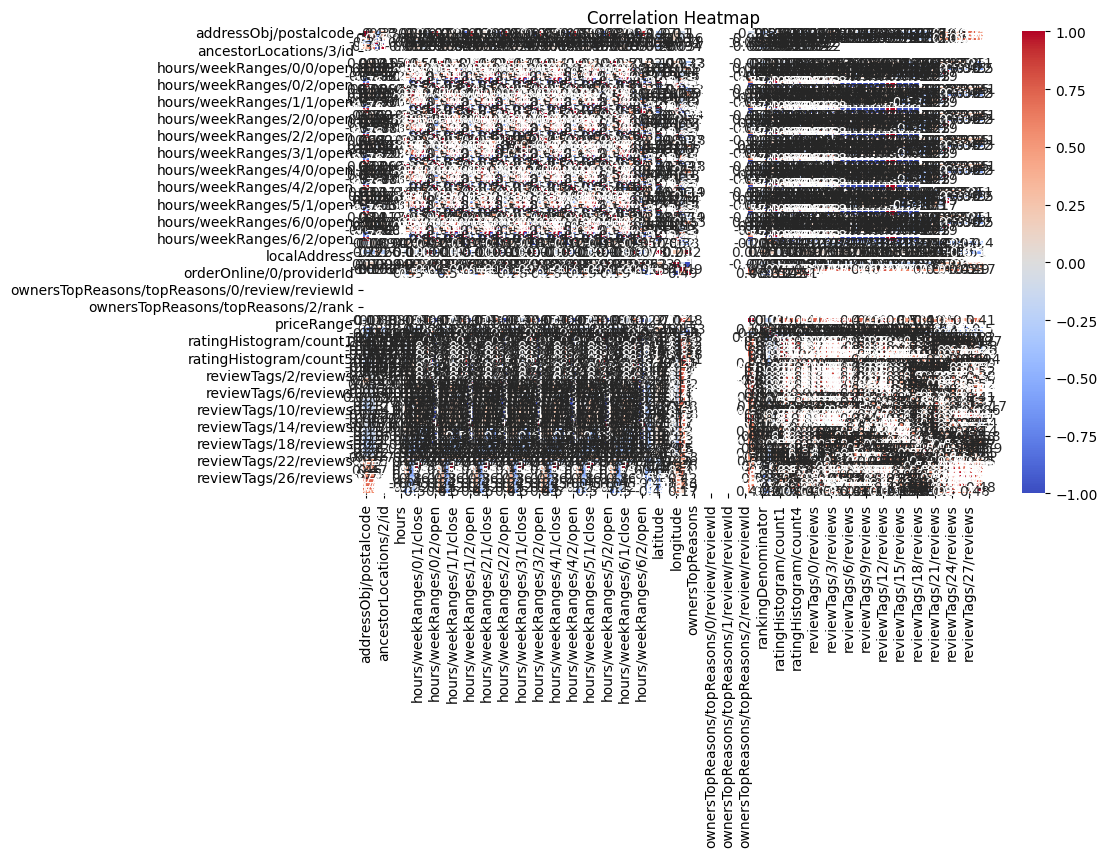

In [ ]:
# Correlation heatmap for numeric features
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Distribution plots for numerical features
numerical_cols = df.select_dtypes(include='number').columns
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

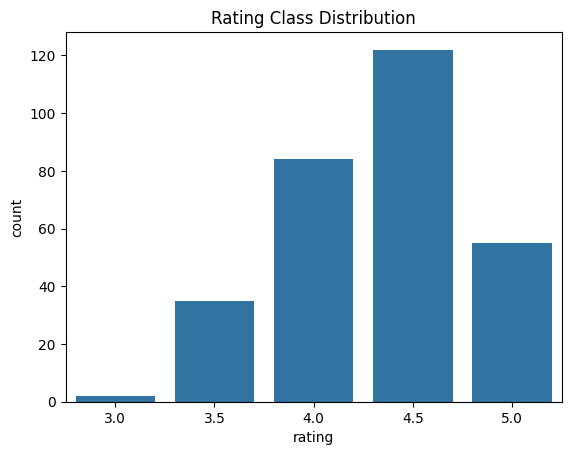

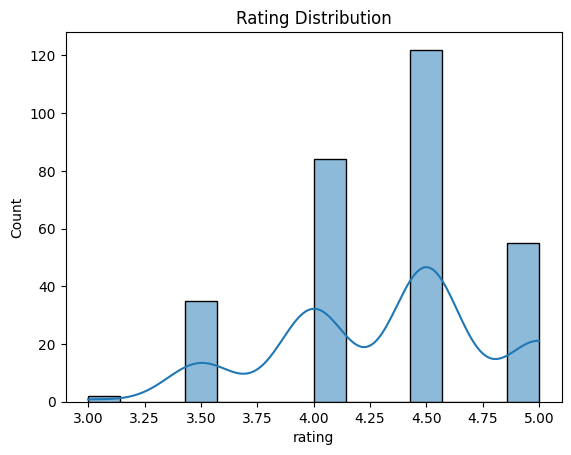

In [ ]:
# For classification
sns.countplot(x='rating', data=df)
plt.title('Rating Class Distribution')
plt.show()

# For regression (continuous ratings)
sns.histplot(df['rating'], kde=True)
plt.title('Rating Distribution')
plt.show()

In [ ]:
# Distribution plots for numerical features
numerical_cols = df.select_dtypes(include='number').columns # Recalculate numerical_cols based on the current df
for col in numerical_cols:
    if df[col].dtype in [np.int64, np.float64]:  # Ensure the column is numeric
        plt.figure(figsize=(8, 4))
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col}')
        plt.tight_layout()
        plt.show()
    else:
        print(f"Skipping column '{col}' as it is not numeric.") # This line will help to identify any unexpected non-numeric columns.

In [ ]:
constant_cols = [col for col in df.columns if df[col].nunique() <= 1]
print("Columns with constant or single unique values:", constant_cols)

Columns with constant or single unique values: ['addressObj/country', 'ancestorLocations/3/id', 'ancestorLocations/3/name', 'ancestorLocations/3/subcategory', 'category', 'dietaryRestrictions/4', 'dishes/25', 'dishes/26', 'dishes/27', 'dishes/28', 'dishes/29', 'establishmentTypes/2', 'hours', 'hours/timezone', 'input', 'isClaimedText', 'isClosed', 'isLongClosed', 'localAddress', 'localName', 'mealTypes/5', 'orderOnline/0/buttonText', 'orderOnline/0/headerText', 'orderOnline/0/providerType', 'ownersTopReasons', 'ownersTopReasons/sectionHeader', 'ownersTopReasons/sponsoredBy', 'ownersTopReasons/topReasons/0/header', 'ownersTopReasons/topReasons/0/image_url', 'ownersTopReasons/topReasons/0/isSearchTerm', 'ownersTopReasons/topReasons/0/keyword', 'ownersTopReasons/topReasons/0/linkText', 'ownersTopReasons/topReasons/0/rank', 'ownersTopReasons/topReasons/0/review/rating', 'ownersTopReasons/topReasons/0/review/reviewId', 'ownersTopReasons/topReasons/0/review/screenName', 'ownersTopReasons/top

In [ ]:
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"\nTop 5 categories in {col}:\n", df[col].value_counts().head())


Top 5 categories in address:
 address
77 Galle Road, Colombo 00300 Sri Lanka                                                        3
115 Sir Chittampalam A Gardiner Mawatha Cinnamon Lakeside Colombo, Colombo 00200 Sri Lanka    3
2 Galle Road, Colombo 00300 Sri Lanka                                                         2
30 Sir Mohamed Macan Markar Mawatha Ramada Colombo, Colombo 00300 Sri Lanka                   2
1 Galle Face Shangri-La Hotel, Colombo 00200 Sri Lanka                                        2
Name: count, dtype: int64

Top 5 categories in addressObj/city:
 addressObj/city
Colombo                   250
Dehiwala-Mount Lavinia     11
Wattala                     5
Battaramulla                5
Maharagama                  4
Name: count, dtype: int64

Top 5 categories in addressObj/country:
 addressObj/country
Sri Lanka    298
Name: count, dtype: int64

Top 5 categories in addressObj/street1:
 addressObj/street1
77 Galle Road                            5
48 Janadhipathi 

In [ ]:
print("\nCategorical Feature Cardinality:")
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")


Categorical Feature Cardinality:
address: 289 unique values
addressObj/city: 19 unique values
addressObj/country: 1 unique values
addressObj/street1: 271 unique values
addressObj/street2: 120 unique values
ancestorLocations/0/name: 19 unique values
ancestorLocations/0/subcategory: 2 unique values
ancestorLocations/1/name: 2 unique values
ancestorLocations/1/subcategory: 2 unique values
ancestorLocations/2/name: 2 unique values
ancestorLocations/2/subcategory: 2 unique values
ancestorLocations/3/name: 1 unique values
ancestorLocations/3/subcategory: 1 unique values
category: 1 unique values
cuisines/0: 27 unique values
cuisines/1: 37 unique values
cuisines/2: 34 unique values
cuisines/3: 36 unique values
cuisines/4: 25 unique values
cuisines/5: 14 unique values
cuisines/6: 4 unique values
description: 181 unique values
dietaryRestrictions/0: 4 unique values
dietaryRestrictions/1: 3 unique values
dietaryRestrictions/2: 2 unique values
dietaryRestrictions/3: 2 unique values
dietaryRestri

In [ ]:
# Check for object columns that might have numbers
for col in categorical_cols:
    try:
        df[col].astype(float)
        print(f"{col} contains numeric values as strings!")
    except:
        continue

orderOnline/0/canProvideTimeslots contains numeric values as strings!
ownersTopReasons/topReasons/0/isSearchTerm contains numeric values as strings!
ownersTopReasons/topReasons/1/isSearchTerm contains numeric values as strings!
ownersTopReasons/topReasons/2/isSearchTerm contains numeric values as strings!


In [ ]:
# Renaming Columns for Consistency: Replace '/' with '_'
# This step standardizes column names by replacing '/' with '_' to avoid issues in processing
df.columns = [col.strip().lower().replace(' ', '_').replace('/', '_') for col in df.columns]

# Append 'addressobj_postalcode' to 'address', separated by a comma, if the column exists
# This step checks if 'addressobj_postalcode' is in the dataframe
if 'addressobj_postalcode' in df.columns:
    # Combine 'address' and 'addressobj_postalcode', separating them with a comma if both are non-empty
    df['address'] = df.apply(
        lambda row: f"{row['address']}, {row['addressobj_postalcode']}" if pd.notna(row['addressobj_postalcode']) else row['address'], axis=1)
    # Drop the 'addressobj_postalcode' column after appending its data
    df = df.drop(columns=['addressobj_postalcode'])

# Combine 'addressobj_street2' into 'addressobj_street1' and rename it to 'addressobj_street'
# This step checks if 'addressobj_street2' is in the dataframe
if 'addressobj_street2' in df.columns and 'addressobj_street1' in df.columns:
    # Combine 'addressobj_street1' and 'addressobj_street2', separated by a comma if both are non-empty
    df['addressobj_street1'] = df.apply(
        lambda row: f"{row['addressobj_street1']}, {row['addressobj_street2']}" if pd.notna(row['addressobj_street2']) else row['addressobj_street1'], axis=1)
    # Rename 'addressobj_street1' to 'addressobj_street'
    df.rename(columns={'addressobj_street1': 'addressobj_street'}, inplace=True)
    # Drop the 'addressobj_street2' column after appending its data
    df = df.drop(columns=['addressobj_street2'])

# Function to combine multiple columns into one
def combine_columns(row, column_list):
    # Check if the column_list exists and has valid columns
    valid_columns = [col for col in column_list if col in row.index]

    if valid_columns:
        combined_value = ', '.join(row[valid_columns].dropna().astype(str)).strip()
        if combined_value:
            return combined_value

    return "unknown"

# Identify and merge grouped columns
categories = ['cuisines', 'dietaryrestrictions', 'dishes', 'features', 'mealtypes', 'establishmenttypes']
for category in categories:
    category_columns = [col for col in df.columns if col.startswith(f'{category}_')]

    if category_columns:
        df.loc[:, category] = df.apply(lambda row: combine_columns(row, category_columns), axis=1)
        df = df.drop(columns=category_columns, errors='ignore')  # `errors='ignore'` ensures safe column dropping

# Drop unnecessary columns
drop_columns = [col for col in df.columns if col.startswith(('photos_', 'hours_', 'orderonline_', 'ownerstopreasons', 'price_',
                                                             'ancestorlocations_','nearestmetrostations_', 'neighborhoodlocations_',
                                                             'ratinghistogram_', 'reviewtags_'))]
df = df.drop(columns=drop_columns, errors='ignore')

# These columns are no longer needed in the dataset
columns_to_drop = ['hours', 'input', 'isclaimedicon', 'isclaimedtext', 'isclosed', 'islongclosed', 'image', 'isnearbyresult', 'addressobj_state',
                   'travelerchoiceaward', 'establishmenttypes', 'dishes', 'type', 'website', 'isnearbyresult', 'localaddress', 'localname',
                   'opennowtext', 'photocount', 'pricerange', 'locallangcode', 'id', 'locationstring','menuweburl',
                   'subcategories_0', 'addressobj_country', 'addressobj_street', 'addressobj_postalcode', 'rankingstring'
]
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

# Replace missing values with the appropriate message
def replace_missing_values(row, col):
    if pd.isna(row[col]):
        return "unknown"
    else:
        return row[col]

# Apply default message logic for missing values
default_message_columns = ['pricelevel', 'website']
for col in default_message_columns:
    if col in df.columns:
        df[col] = df.apply(lambda row: replace_missing_values(row, col), axis=1)

columns_to_replace = [
    'latitude', 'longitude', 'travelerchoiceaward', 'rankingdenominator', 'description',
    'rankingposition', 'rankingstring', 'rating', 'rawranking', 'reviews_and_text', 'phone', 'email'
]

# Replace missing values: text columns with 'unknown', numeric score columns with 0
for col in columns_to_replace:
    if col in df.columns:
      df[col] = df[col].fillna('unknown')

# Print final columns to verify
print(df.columns)
data = df.head()
display(data)

# Remove duplicate rows based on all columns
df.drop_duplicates()

# Save the modified data to a new Excel file
# The preprocessed file contains standardized column names, a combined 'amenities' column,
# an updated 'address' column, and an updated 'addressobj_street' column
output_file = '/content/drive/My Drive/Colombo/PreprocessedRestaurantsColombo.csv'
df.to_csv(output_file, index=False)

print(f"Preprocessing complete. Cleaned data saved to '{output_file}'")

Index(['address', 'addressobj_city', 'category', 'description', 'email',
       'latitude', 'longitude', 'name', 'numberofreviews', 'phone',
       'pricelevel', 'rankingdenominator', 'rankingposition', 'rating',
       'rawranking', 'weburl', 'cuisines', 'dietaryrestrictions', 'features',
       'mealtypes'],
      dtype='object')


,address,addressobj_city,category,description,email,latitude,longitude,name,numberofreviews,phone,pricelevel,rankingdenominator,rankingposition,rating,rawranking,weburl,cuisines,dietaryrestrictions,features,mealtypes
0,"57 Ward Place Roof Top, Jetwing Colombo Seven,...",Colombo,restaurant,Named after our sophisticated location on Ward...,resv.colomboseven@jetwinghotels.com,6.91658,79.86995,Ward 7,42,+94 11 2 550200,$$ - $$$,880,148,4.5,3.417001,https://www.tripadvisor.com/Restaurant_Review-...,"Bar, Pub",unknown,"Reservations, Outdoor Seating, Seating, Televi...","Lunch, Dinner, Brunch, Late Night, Drinks"
1,"2 Galle Road, Colombo 00300 Sri Lanka, 300.0",Colombo,restaurant,1864 Limited Edition is a high-class restauran...,info@1864limitededition.com,unknown,unknown,1864 Limited Edition,18,+94742601641,$$$$,880,131,5.0,3.457108,https://www.tripadvisor.com/Restaurant_Review-...,French,unknown,"Reservations, Private Dining, Seating, Parking...","Dinner, Late Night, Drinks"
2,"106 Thimbirigasyaya Road, Colombo 00500 Sri La...",Colombo,restaurant,unknown,bubblemebubbletea@gmail.com,6.89345,79.87038,Bubble Me Bubble Tea,26,+94 11 2 554152,$$ - $$$,880,276,4.0,3.165838,https://www.tripadvisor.com/Restaurant_Review-...,Cafe,unknown,Takeout,unknown
3,"10 Galle Face Drive, Colombo 00300 Sri Lanka, ...",Colombo,restaurant,"Breeze Barracuda , the latest addition to Barr...",info@barracuda.lk,6.921183,79.84617,Breeze Barracuda,104,+94 77 070 7050,$$ - $$$,880,196,4.0,3.286445,https://www.tripadvisor.com/Restaurant_Review-...,"Asian, Contemporary, Sri Lankan",Vegetarian friendly,"Reservations, Outdoor Seating, Seating, Serves...","Lunch, Dinner"
4,"590 Colombo - Galle Main Road Marino Mall, Col...",Colombo,restaurant,unknown,unknown,6.900297,79.85292,Shiwu Chinese Restaurant,41,+94 76 245 5599,$$ - $$$,800,233,4.0,3.273561,https://www.tripadvisor.com/Restaurant_Review-...,"Chinese, Asian","Vegetarian friendly, Vegan options","Reservations, Seating, Serves Alcohol, Table S...","Lunch, Dinner"


Preprocessing complete. Cleaned data saved to '/content/drive/My Drive/Colombo/PreprocessedRestaurantsColombo.csv'


In [ ]:
# Load the csv file
file_path = '/content/drive/My Drive/Ella/RestaurantsElla.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the data
df.head()

,address,addressObj/city,addressObj/country,addressObj/postalcode,addressObj/state,addressObj/street1,addressObj/street2,ancestorLocations/0/abbreviation,ancestorLocations/0/id,ancestorLocations/0/name,...,reviewTags/27/text,reviewTags/28/reviews,reviewTags/28/text,reviewTags/29/reviews,reviewTags/29/text,subcategories/0,travelerChoiceAward,type,webUrl,website
0,"Wellawaya Road, Ella Ella's Edge Resort, Ella ...",Ella,Sri Lanka,90090.0,NaN,"Wellawaya Road, Ella",Ella's Edge Resort,NaN,616035,Ella,...,NaN,NaN,NaN,NaN,NaN,Sit down,NaN,RESTAURANT,https://www.tripadvisor.com/Restaurant_Review-...,http://www.ellasedgeresort.com
1,"No 56 Wellawaya Rd, Ella 90090 Sri Lanka",Ella,Sri Lanka,90090.0,NaN,No 56 Wellawaya Rd,NaN,NaN,616035,Ella,...,NaN,NaN,NaN,NaN,NaN,Sit down,NaN,RESTAURANT,https://www.tripadvisor.com/Restaurant_Review-...,http://www.facebook.com/CafeCElla
2,"Ella Rd, Ella 90090 Sri Lanka",Ella,Sri Lanka,90090.0,NaN,Ella Rd,NaN,NaN,616035,Ella,...,NaN,NaN,NaN,NaN,NaN,Sit down,NaN,RESTAURANT,https://www.tripadvisor.com/Restaurant_Review-...,http://www.laellabreeze.com
3,"Railway Station Road, Ella 90090 Sri Lanka",Ella,Sri Lanka,90090.0,NaN,Railway Station Road,NaN,NaN,616035,Ella,...,NaN,NaN,NaN,NaN,NaN,Sit down,NaN,RESTAURANT,https://www.tripadvisor.com/Restaurant_Review-...,http://www.ellalovers.com
4,"No. 36 Waterfall Road, off Ella/Wellawaya Road...",Ella,Sri Lanka,90090.0,NaN,"No. 36 Waterfall Road, off Ella/Wellawaya Road",NaN,NaN,616035,Ella,...,NaN,NaN,NaN,NaN,NaN,Sit down,NaN,RESTAURANT,https://www.tripadvisor.com/Restaurant_Review-...,http://www.ellaspirit.org


In [ ]:
print("\nData Types and Non-null Counts:")
display(df.info())


Data Types and Non-null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Columns: 388 entries, address to website
dtypes: bool(4), float64(175), int64(11), object(198)
memory usage: 468.7+ KB


None

In [ ]:
print("\nStatistical Summary of Numeric Columns:")
display(df.describe())


Statistical Summary of Numeric Columns:


,addressObj/postalcode,addressObj/state,ancestorLocations/0/abbreviation,ancestorLocations/0/id,ancestorLocations/1/abbreviation,ancestorLocations/1/id,ancestorLocations/2/abbreviation,ancestorLocations/2/id,ancestorLocations/3/abbreviation,ancestorLocations/3/id,...,reviewTags/20/reviews,reviewTags/21/reviews,reviewTags/22/reviews,reviewTags/23/reviews,reviewTags/24/reviews,reviewTags/25/reviews,reviewTags/26/reviews,reviewTags/27/reviews,reviewTags/28/reviews,reviewTags/29/reviews
count,150.000000,0.0,0.0,1.560000e+02,0.0,156.0,0.0,156.0,0.0,0.0,...,11.000000,11.000000,11.000000,11.000000,10.000000,8.000000,8.000000,6.000000,6.000000,5.000000
mean,90104.640000,NaN,NaN,7.902567e+05,NaN,2467811.0,NaN,293961.0,NaN,NaN,...,42.000000,50.272727,187.454545,35.636364,84.300000,77.875000,48.375000,39.500000,67.833333,99.400000
std,112.093279,NaN,NaN,1.875156e+06,NaN,0.0,NaN,0.0,NaN,NaN,...,111.676318,84.337525,568.851890,58.194970,225.569428,184.313737,100.211116,75.394297,143.776795,205.023901
min,90090.000000,NaN,NaN,6.160350e+05,NaN,2467811.0,NaN,293961.0,NaN,NaN,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000
25%,90090.000000,NaN,NaN,6.160350e+05,NaN,2467811.0,NaN,293961.0,NaN,NaN,...,3.000000,4.000000,3.500000,4.000000,3.750000,5.000000,4.500000,6.000000,6.000000,2.000000
50%,90090.000000,NaN,NaN,6.160350e+05,NaN,2467811.0,NaN,293961.0,NaN,NaN,...,5.000000,13.000000,16.000000,9.000000,12.000000,9.000000,14.000000,9.500000,7.500000,11.000000
75%,90090.000000,NaN,NaN,6.160350e+05,NaN,2467811.0,NaN,293961.0,NaN,NaN,...,16.500000,62.000000,23.500000,42.000000,15.250000,27.500000,24.750000,16.000000,18.750000,16.000000
max,91200.000000,NaN,NaN,2.395722e+07,NaN,2467811.0,NaN,293961.0,NaN,NaN,...,378.000000,292.000000,1902.000000,193.000000,725.000000,533.000000,295.000000,193.000000,361.000000,466.000000


In [ ]:
print("\nMissing Values in Each Column:")
display(df.isnull().sum())


Missing Values in Each Column:


,0
address,0
addressObj/city,0
addressObj/country,0
addressObj/postalcode,6
addressObj/state,156
...,...
subcategories/0,64
travelerChoiceAward,153
type,0
webUrl,0


In [ ]:
# Check for duplicates
print("\nNumber of Duplicate Rows:", df.duplicated().sum())


Number of Duplicate Rows: 0


In [ ]:
# Column-wise unique values
print("\nUnique values in each column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")


Unique values in each column:
address: 137 unique values
addressObj/city: 5 unique values
addressObj/country: 1 unique values
addressObj/postalcode: 7 unique values
addressObj/state: 0 unique values
addressObj/street1: 127 unique values
addressObj/street2: 30 unique values
ancestorLocations/0/abbreviation: 0 unique values
ancestorLocations/0/id: 5 unique values
ancestorLocations/0/name: 5 unique values
ancestorLocations/0/subcategory: 1 unique values
ancestorLocations/1/abbreviation: 0 unique values
ancestorLocations/1/id: 1 unique values
ancestorLocations/1/name: 1 unique values
ancestorLocations/1/subcategory: 1 unique values
ancestorLocations/2/abbreviation: 0 unique values
ancestorLocations/2/id: 1 unique values
ancestorLocations/2/name: 1 unique values
ancestorLocations/2/subcategory: 1 unique values
ancestorLocations/3/abbreviation: 0 unique values
ancestorLocations/3/id: 0 unique values
ancestorLocations/3/name: 0 unique values
ancestorLocations/3/subcategory: 0 unique values
a

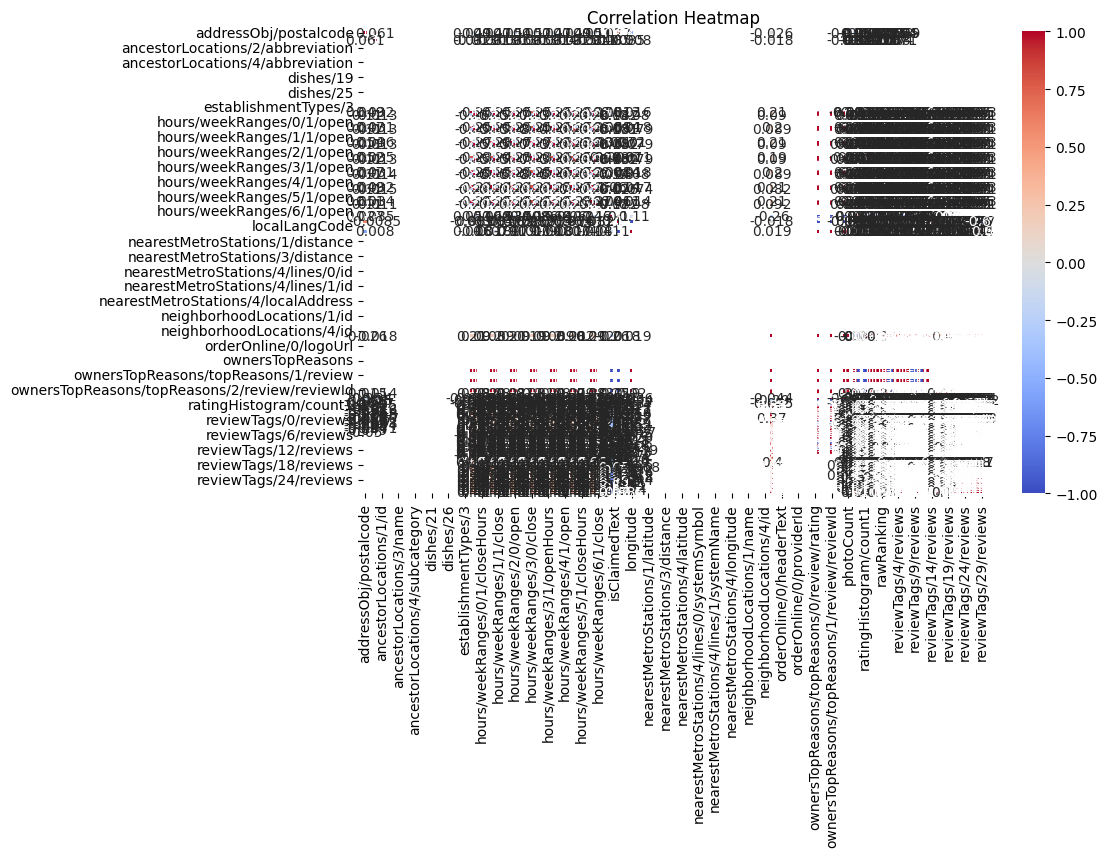

In [ ]:
# Correlation heatmap for numeric features
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Distribution plots for numerical features
numerical_cols = df.select_dtypes(include='number').columns
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

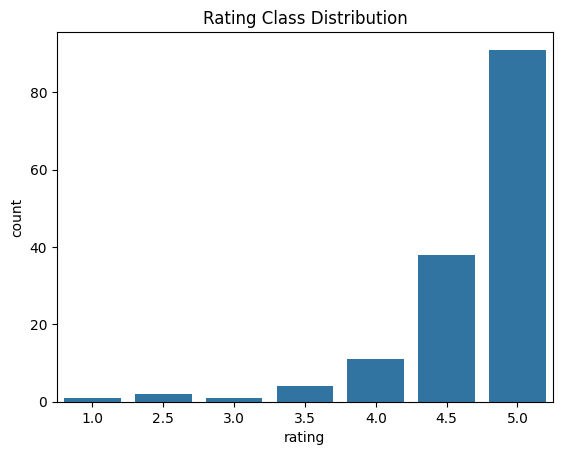

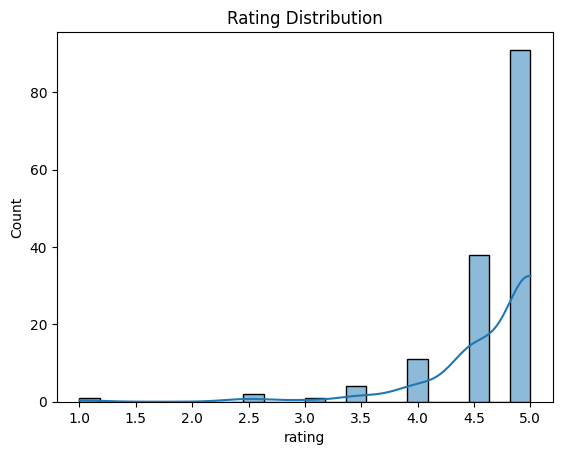

In [ ]:
# For classification
sns.countplot(x='rating', data=df)
plt.title('Rating Class Distribution')
plt.show()

# For regression (continuous ratings)
sns.histplot(df['rating'], kde=True)
plt.title('Rating Distribution')
plt.show()

In [ ]:
# Distribution plots for numerical features
numerical_cols = df.select_dtypes(include='number').columns # Recalculate numerical_cols based on the current df
for col in numerical_cols:
    if df[col].dtype in [np.int64, np.float64]:  # Ensure the column is numeric
        plt.figure(figsize=(8, 4))
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col}')
        plt.tight_layout()
        plt.show()
    else:
        print(f"Skipping column '{col}' as it is not numeric.") # This line will help to identify any unexpected non-numeric columns.

In [ ]:
constant_cols = [col for col in df.columns if df[col].nunique() <= 1]
print("Columns with constant or single unique values:", constant_cols)

Columns with constant or single unique values: ['addressObj/country', 'addressObj/state', 'ancestorLocations/0/abbreviation', 'ancestorLocations/0/subcategory', 'ancestorLocations/1/abbreviation', 'ancestorLocations/1/id', 'ancestorLocations/1/name', 'ancestorLocations/1/subcategory', 'ancestorLocations/2/abbreviation', 'ancestorLocations/2/id', 'ancestorLocations/2/name', 'ancestorLocations/2/subcategory', 'ancestorLocations/3/abbreviation', 'ancestorLocations/3/id', 'ancestorLocations/3/name', 'ancestorLocations/3/subcategory', 'ancestorLocations/4/abbreviation', 'ancestorLocations/4/id', 'ancestorLocations/4/name', 'ancestorLocations/4/subcategory', 'category', 'cuisines/7', 'cuisines/8', 'dietaryRestrictions/1', 'dietaryRestrictions/2', 'dietaryRestrictions/3', 'dishes/17', 'dishes/18', 'dishes/19', 'dishes/20', 'dishes/21', 'dishes/22', 'dishes/23', 'dishes/24', 'dishes/25', 'dishes/26', 'dishes/27', 'dishes/28', 'dishes/29', 'establishmentTypes/2', 'establishmentTypes/3', 'featur

In [ ]:
categorical_cols = df.select_dtypes(include='object').columns # Redefine categorical_cols
for col in categorical_cols:
    print(f"\nTop 5 categories in {col}:\n", df[col].value_counts().head())


Top 5 categories in address:
 address
Waterfall Road, Ella 90090 Sri Lanka          5
Wellawaya Road, Ella 90090 Sri Lanka          5
Passara Road, Ella 90090 Sri Lanka            4
Railway Station Road, Ella 90090 Sri Lanka    4
Wemullahena, Ella 90090 Sri Lanka             2
Name: count, dtype: int64

Top 5 categories in addressObj/city:
 addressObj/city
Ella           150
Haputale         3
Bandarawela      1
Kithalella       1
Wellawaya        1
Name: count, dtype: int64

Top 5 categories in addressObj/country:
 addressObj/country
Sri Lanka    156
Name: count, dtype: int64

Top 5 categories in addressObj/street1:
 addressObj/street1
Wellawaya Road          7
Waterfall Road          6
Passara Road            6
Railway Station Road    4
Main Street             3
Name: count, dtype: int64

Top 5 categories in addressObj/street2:
 addressObj/street2
Ella                                                    2
Ella's Edge Resort                                      1
Passara Road         

In [ ]:
print("\nCategorical Feature Cardinality:")
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")


Categorical Feature Cardinality:
address: 137 unique values
addressObj/city: 5 unique values
addressObj/country: 1 unique values
addressObj/street1: 127 unique values
addressObj/street2: 30 unique values
ancestorLocations/0/name: 5 unique values
ancestorLocations/0/subcategory: 1 unique values
ancestorLocations/1/name: 1 unique values
ancestorLocations/1/subcategory: 1 unique values
ancestorLocations/2/name: 1 unique values
ancestorLocations/2/subcategory: 1 unique values
category: 1 unique values
cuisines/0: 21 unique values
cuisines/1: 23 unique values
cuisines/2: 19 unique values
cuisines/3: 14 unique values
cuisines/4: 13 unique values
cuisines/5: 7 unique values
cuisines/6: 2 unique values
cuisines/7: 1 unique values
cuisines/8: 1 unique values
description: 85 unique values
dietaryRestrictions/0: 2 unique values
dietaryRestrictions/1: 1 unique values
dietaryRestrictions/2: 1 unique values
dishes/0: 12 unique values
dishes/1: 13 unique values
dishes/2: 21 unique values
dishes/3: 2

In [ ]:
# Check for object columns that might have numbers
for col in categorical_cols:
    try:
        df[col].astype(float)
        print(f"{col} contains numeric values as strings!")
    except:
        continue

ownersTopReasons/topReasons/0/isSearchTerm contains numeric values as strings!
ownersTopReasons/topReasons/1/isSearchTerm contains numeric values as strings!
ownersTopReasons/topReasons/2/isSearchTerm contains numeric values as strings!


In [ ]:
# Renaming Columns for Consistency: Replace '/' with '_'
# This step standardizes column names by replacing '/' with '_' to avoid issues in processing
df.columns = [col.strip().lower().replace(' ', '_').replace('/', '_') for col in df.columns]

# Append 'addressobj_postalcode' to 'address', separated by a comma, if the column exists
# This step checks if 'addressobj_postalcode' is in the dataframe
if 'addressobj_postalcode' in df.columns:
    # Combine 'address' and 'addressobj_postalcode', separating them with a comma if both are non-empty
    df['address'] = df.apply(
        lambda row: f"{row['address']}, {row['addressobj_postalcode']}" if pd.notna(row['addressobj_postalcode']) else row['address'], axis=1)
    # Drop the 'addressobj_postalcode' column after appending its data
    df = df.drop(columns=['addressobj_postalcode'])

# Combine 'addressobj_street2' into 'addressobj_street1' and rename it to 'addressobj_street'
# This step checks if 'addressobj_street2' is in the dataframe
if 'addressobj_street2' in df.columns and 'addressobj_street1' in df.columns:
    # Combine 'addressobj_street1' and 'addressobj_street2', separated by a comma if both are non-empty
    df['addressobj_street1'] = df.apply(
        lambda row: f"{row['addressobj_street1']}, {row['addressobj_street2']}" if pd.notna(row['addressobj_street2']) else row['addressobj_street1'], axis=1)
    # Rename 'addressobj_street1' to 'addressobj_street'
    df.rename(columns={'addressobj_street1': 'addressobj_street'}, inplace=True)
    # Drop the 'addressobj_street2' column after appending its data
    df = df.drop(columns=['addressobj_street2'])

# Function to combine multiple columns into one
def combine_columns(row, column_list):
    # Check if the column_list exists and has valid columns
    valid_columns = [col for col in column_list if col in row.index]

    if valid_columns:
        combined_value = ', '.join(row[valid_columns].dropna().astype(str)).strip()
        if combined_value:
            return combined_value

    return "unknown"

# Identify and merge grouped columns
categories = ['cuisines', 'dietaryrestrictions', 'dishes', 'features', 'mealtypes', 'establishmenttypes']
for category in categories:
    category_columns = [col for col in df.columns if col.startswith(f'{category}_')]

    if category_columns:
        df.loc[:, category] = df.apply(lambda row: combine_columns(row, category_columns), axis=1)
        df = df.drop(columns=category_columns, errors='ignore')  # `errors='ignore'` ensures safe column dropping

# Drop unnecessary columns
drop_columns = [col for col in df.columns if col.startswith(('photos_', 'hours_', 'orderonline_', 'ownerstopreasons',
                                                             'price_', 'ancestorlocations_', 'nearestmetrostations_',
                                                             'neighborhoodlocations_', 'ratinghistogram_', 'reviewtags_'))]
df = df.drop(columns=drop_columns, errors='ignore')

# These columns are no longer needed in the dataset
columns_to_drop = ['hours', 'input', 'isclaimedicon', 'isclaimedtext', 'isclosed', 'islongclosed', 'image', 'isnearbyresult',
                   'addressobj_state', 'travelerchoiceaward', 'establishmenttypes', 'dishes', 'type', 'website',
                   'isnearbyresult', 'localaddress', 'localname', 'opennowtext', 'photocount', 'pricerange',
                   'locallangcode', 'id', 'locationstring','menuweburl', 'subcategories_0',
                   'addressobj_country', 'addressobj_street', 'addressobj_postalcode', 'rankingstring'
]
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

# Replace missing values with the appropriate message
def replace_missing_values(row, col):
    if pd.isna(row[col]):
        return f"unknown"
    else:
        return row[col]

# Apply default message logic for missing values
default_message_columns = ['pricelevel', 'website']
for col in default_message_columns:
    if col in df.columns:
        df[col] = df.apply(lambda row: replace_missing_values(row, col), axis=1)

columns_to_replace = [
    'latitude', 'longitude', 'travelerchoiceaward', 'rankingdenominator', 'description',
    'rankingposition', 'rankingstring', 'rating', 'rawranking', 'reviews_and_text', 'phone', 'email'
]

# Replace missing values: text columns with 'not provided', numeric score columns with 0
for col in columns_to_replace:
    if col in df.columns:
      df[col] = df[col].fillna('unknown')

# Print final columns to verify
print(df.columns)
data = df.head()
display(data)

# Save the modified data to a new Excel file
# The preprocessed file contains standardized column names, a combined 'amenities' column,
# an updated 'address' column, and an updated 'addressobj_street' column
output_file = '/content/drive/My Drive/Ella/PreprocessedRestaurantsElla.csv'
df.to_csv(output_file, index=False)

print(f"Preprocessing complete. Cleaned data saved to '{output_file}'")

Index(['address', 'addressobj_city', 'category', 'description', 'email',
       'latitude', 'longitude', 'name', 'numberofreviews', 'phone',
       'pricelevel', 'rankingdenominator', 'rankingposition', 'rating',
       'rawranking', 'weburl', 'cuisines', 'dietaryrestrictions', 'features',
       'mealtypes'],
      dtype='object')


,address,addressobj_city,category,description,email,latitude,longitude,name,numberofreviews,phone,pricelevel,rankingdenominator,rankingposition,rating,rawranking,weburl,cuisines,dietaryrestrictions,features,mealtypes
0,"Wellawaya Road, Ella Ella's Edge Resort, Ella ...",Ella,restaurant,unknown,info@ellasedgeresort.com,6.870678,81.04761,Ella's Edge Restaurant,44,+94 77 393 0455,$$ - $$$,177.0,72.0,4.5,3.306603,https://www.tripadvisor.com/Restaurant_Review-...,"Italian, Chinese, Indian, Asian, Sri Lankan",Vegetarian friendly,"Outdoor Seating, Seating, Table Service","Breakfast, Lunch, Dinner"
1,"No 56 Wellawaya Rd, Ella 90090 Sri Lanka, 90090.0",Ella,restaurant,Cafe C is one of the most famous restaurants i...,ellacafec@gmail.com,6.874613,81.04735,Cafe C Ella,435,+94 71 814 1746,$,154.0,19.0,5.0,4.67991,https://www.tripadvisor.com/Restaurant_Review-...,"Chinese, Grill, Street Food, Sri Lankan","Vegetarian friendly, Vegan options, Gluten fre...","Takeout, Outdoor Seating, Seating, Wheelchair ...","Lunch, Dinner"
2,"Ella Rd, Ella 90090 Sri Lanka, 90090.0",Ella,restaurant,La Vista This large and busy restaurant and ba...,info@oakraylaellabreeze.com,6.873278,81.04905,Oak Ray La Ella Breeze,631,+94 76 442 0331,$,177.0,53.0,4.0,3.697622,https://www.tripadvisor.com/Restaurant_Review-...,"Beijing Specialties, NorthWestern Chinese, Sri...","Vegetarian friendly, Vegan options","Takeout, Reservations, Outdoor Seating, Buffet...","Breakfast, Lunch, Dinner, Late Night"
3,"Railway Station Road, Ella 90090 Sri Lanka, 90...",Ella,restaurant,Element Hiking Bar is an ECO friendly restaura...,ellementhiking.bar@gmail.com,6.874612,81.046936,Hiking Bar & Restaurant,885,+94 77 592 9597,$,177.0,9.0,5.0,4.829502,https://www.tripadvisor.com/Restaurant_Review-...,"Chinese, Bar, Cafe, Asian, Sri Lankan","Vegetarian friendly, Vegan options","Takeout, Outdoor Seating, Seating, Street Park...","Breakfast, Lunch, Dinner, Brunch, Drinks"
4,"No. 36 Waterfall Road, off Ella/Wellawaya Road...",Ella,restaurant,Located outside Ella Town to keep the 'hype' a...,lank.sheldrake@yahoo.com,6.825725,81.07735,BarCeylona Space Cafe,1,+94 71 756 8049,$$ - $$$,177.0,138.0,5.0,3.019732,https://www.tripadvisor.com/Restaurant_Review-...,"French, German, Asian, Sri Lankan",unknown,unknown,unknown


Preprocessing complete. Cleaned data saved to '/content/drive/My Drive/Ella/PreprocessedRestaurantsElla.csv'


In [ ]:
# Load the csv file
file_path = '/content/drive/My Drive/Kandy/KandyRestaurants.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the data
df.head()

,address,addressObj/city,addressObj/country,addressObj/postalcode,addressObj/state,addressObj/street1,addressObj/street2,ancestorLocations/0/abbreviation,ancestorLocations/0/id,ancestorLocations/0/name,...,reviewTags/25/text,reviewTags/26/reviews,reviewTags/26/text,reviewTags/27/reviews,reviewTags/27/text,subcategories/0,travelerChoiceAward,type,webUrl,website
0,"12 Mahamaya Mawatha, Kandy 20000 Sri Lanka",Kandy,Sri Lanka,20000.0,NaN,12 Mahamaya Mawatha,NaN,NaN,304138,Kandy,...,NaN,NaN,NaN,NaN,NaN,Sit down,NaN,RESTAURANT,https://www.tripadvisor.com/Restaurant_Review-...,https://www.grandserendibhotel.com/index.php
1,"839 Peradeniya Road Kandyan Arts Residency, Ka...",Kandy,Sri Lanka,20000.0,NaN,839 Peradeniya Road,Kandyan Arts Residency,NaN,304138,Kandy,...,NaN,NaN,NaN,NaN,NaN,Sit down,NaN,RESTAURANT,https://www.tripadvisor.com/Restaurant_Review-...,http://hotelkandyanarts.com/
2,"9 Sangaraja Mawatha, Kandy 8 Sri Lanka",Kandy,Sri Lanka,8.0,NaN,9 Sangaraja Mawatha,NaN,NaN,304138,Kandy,...,NaN,NaN,NaN,NaN,NaN,Sit down,NaN,RESTAURANT,https://www.tripadvisor.com/Restaurant_Review-...,NaN
3,"155 S W R D Bandaranayake Road, Kandy 20000 Sr...",Kandy,Sri Lanka,20000.0,NaN,155 S W R D Bandaranayake Road,NaN,NaN,304138,Kandy,...,NaN,NaN,NaN,NaN,NaN,Sit down,NaN,RESTAURANT,https://www.tripadvisor.com/Restaurant_Review-...,http://www.kandycitystay.com
4,"No. 1C Devi Road Galkaduwa Junction, Kandy 200...",Kandy,Sri Lanka,20000.0,NaN,No. 1C Devi Road,Galkaduwa Junction,NaN,304138,Kandy,...,NaN,NaN,NaN,NaN,NaN,Sit down,NaN,RESTAURANT,https://www.tripadvisor.com/Restaurant_Review-...,https://www.facebook.com/profile.php?id=615576...


In [ ]:
print("\nData Types and Non-null Counts:")
display(df.info())


Data Types and Non-null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Columns: 324 entries, address to website
dtypes: bool(4), float64(132), int64(13), object(175)
memory usage: 465.9+ KB


None

In [ ]:
print("\nStatistical Summary of Numeric Columns:")
display(df.describe())


Statistical Summary of Numeric Columns:


,addressObj/postalcode,addressObj/state,ancestorLocations/0/abbreviation,ancestorLocations/0/id,ancestorLocations/1/abbreviation,ancestorLocations/1/id,ancestorLocations/2/abbreviation,ancestorLocations/2/id,ancestorLocations/3/abbreviation,ancestorLocations/3/id,...,reviewTags/18/reviews,reviewTags/19/reviews,reviewTags/20/reviews,reviewTags/21/reviews,reviewTags/22/reviews,reviewTags/23/reviews,reviewTags/24/reviews,reviewTags/25/reviews,reviewTags/26/reviews,reviewTags/27/reviews
count,183.000000,0.0,0.0,1.860000e+02,0.0,1.860000e+02,0.0,1.860000e+02,0.0,185.0,...,7.000000,7.000000,5.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.00000,2.0
mean,20503.163934,NaN,NaN,4.230324e+05,NaN,1.223629e+07,NaN,2.456143e+06,NaN,293961.0,...,3.571429,4.428571,7.200000,14.000000,3.333333,11.000000,8.500000,4.000000,4.50000,3.0
std,7416.227115,NaN,NaN,6.632908e+05,NaN,7.201312e+05,NaN,1.593958e+05,NaN,0.0,...,1.812654,2.225395,5.069517,12.288206,1.527525,12.727922,7.778175,2.828427,2.12132,0.0
min,8.000000,NaN,NaN,3.041380e+05,NaN,2.467812e+06,NaN,2.939610e+05,NaN,293961.0,...,2.000000,2.000000,2.000000,5.000000,2.000000,2.000000,3.000000,2.000000,3.00000,3.0
25%,20000.000000,NaN,NaN,3.041380e+05,NaN,1.228909e+07,NaN,2.467830e+06,NaN,293961.0,...,2.000000,3.000000,4.000000,7.000000,2.500000,6.500000,5.750000,3.000000,3.75000,3.0
50%,20000.000000,NaN,NaN,3.041380e+05,NaN,1.228909e+07,NaN,2.467830e+06,NaN,293961.0,...,3.000000,3.000000,5.000000,9.000000,3.000000,11.000000,8.500000,4.000000,4.50000,3.0
75%,20000.000000,NaN,NaN,3.041380e+05,NaN,1.228909e+07,NaN,2.467830e+06,NaN,293961.0,...,5.000000,6.000000,11.000000,18.500000,4.000000,15.500000,11.250000,5.000000,5.25000,3.0
max,101010.000000,NaN,NaN,7.909853e+06,NaN,1.228909e+07,NaN,2.467830e+06,NaN,293961.0,...,6.000000,8.000000,14.000000,28.000000,5.000000,20.000000,14.000000,6.000000,6.00000,3.0


In [ ]:
print("\nMissing Values in Each Column:")
display(df.isnull().sum())


Missing Values in Each Column:


,0
address,0
addressObj/city,0
addressObj/country,0
addressObj/postalcode,3
addressObj/state,186
...,...
subcategories/0,61
travelerChoiceAward,185
type,0
webUrl,0


In [ ]:
# Check for duplicates
print("\nNumber of Duplicate Rows:", df.duplicated().sum())


Number of Duplicate Rows: 0


In [ ]:
# Column-wise unique values
print("\nUnique values in each column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")


Unique values in each column:
address: 185 unique values
addressObj/city: 6 unique values
addressObj/country: 1 unique values
addressObj/postalcode: 15 unique values
addressObj/state: 0 unique values
addressObj/street1: 180 unique values
addressObj/street2: 57 unique values
ancestorLocations/0/abbreviation: 0 unique values
ancestorLocations/0/id: 6 unique values
ancestorLocations/0/name: 6 unique values
ancestorLocations/0/subcategory: 2 unique values
ancestorLocations/1/abbreviation: 0 unique values
ancestorLocations/1/id: 2 unique values
ancestorLocations/1/name: 2 unique values
ancestorLocations/1/subcategory: 2 unique values
ancestorLocations/2/abbreviation: 0 unique values
ancestorLocations/2/id: 2 unique values
ancestorLocations/2/name: 2 unique values
ancestorLocations/2/subcategory: 2 unique values
ancestorLocations/3/abbreviation: 0 unique values
ancestorLocations/3/id: 1 unique values
ancestorLocations/3/name: 1 unique values
ancestorLocations/3/subcategory: 1 unique values


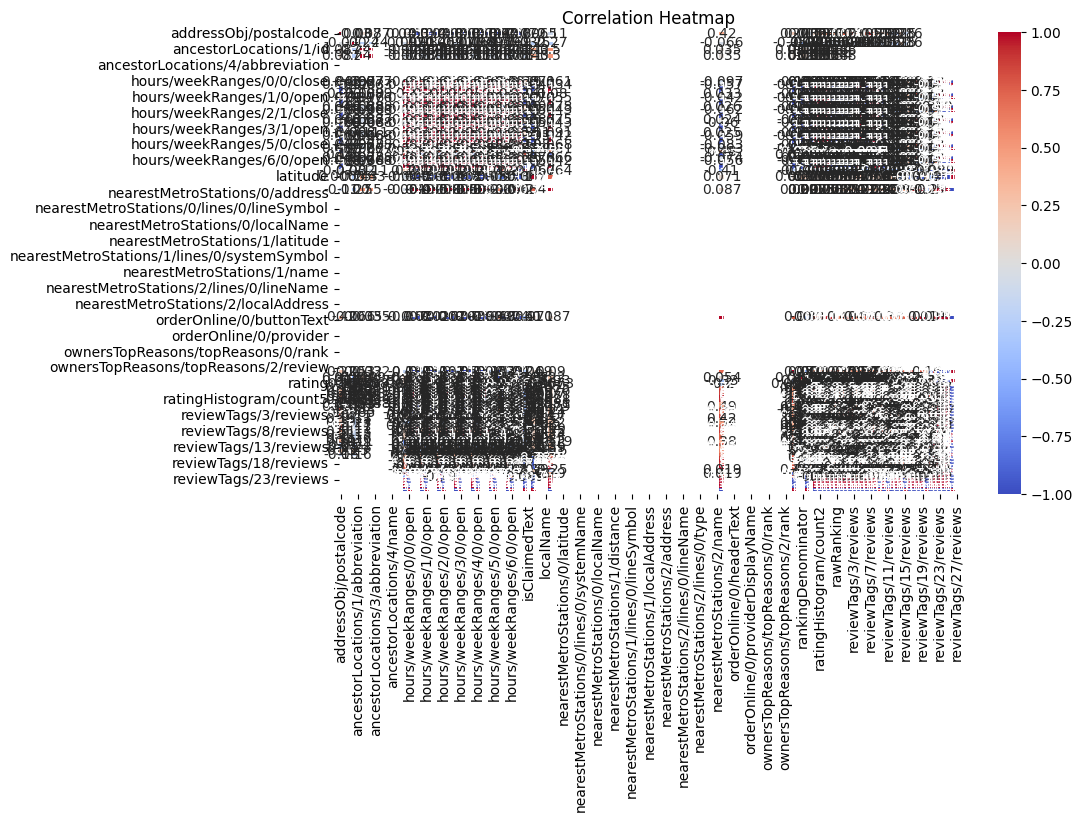

In [ ]:
# Correlation heatmap for numeric features
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Distribution plots for numerical features
numerical_cols = df.select_dtypes(include='number').columns
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

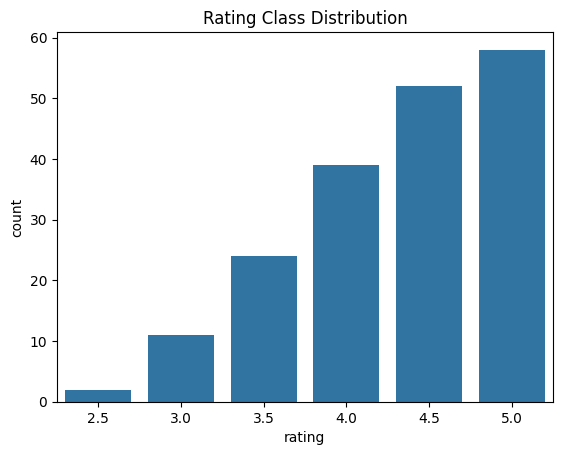

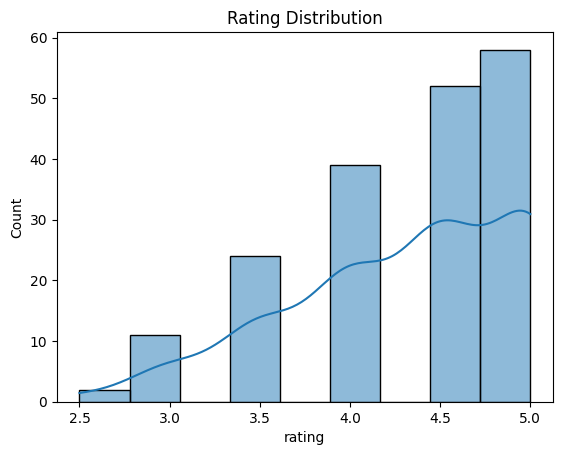

In [ ]:
# For classification
sns.countplot(x='rating', data=df)
plt.title('Rating Class Distribution')
plt.show()

# For regression (continuous ratings)
sns.histplot(df['rating'], kde=True)
plt.title('Rating Distribution')
plt.show()

In [ ]:
# Distribution plots for numerical features
numerical_cols = df.select_dtypes(include='number').columns # Recalculate numerical_cols based on the current df
for col in numerical_cols:
    if df[col].dtype in [np.int64, np.float64]:  # Ensure the column is numeric
        plt.figure(figsize=(8, 4))
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col}')
        plt.tight_layout()
        plt.show()
    else:
        print(f"Skipping column '{col}' as it is not numeric.") # This line will help to identify any unexpected non-numeric columns.

In [ ]:
constant_cols = [col for col in df.columns if df[col].nunique() <= 1]
print("Columns with constant or single unique values:", constant_cols)

Columns with constant or single unique values: ['addressObj/country', 'addressObj/state', 'ancestorLocations/0/abbreviation', 'ancestorLocations/1/abbreviation', 'ancestorLocations/2/abbreviation', 'ancestorLocations/3/abbreviation', 'ancestorLocations/3/id', 'ancestorLocations/3/name', 'ancestorLocations/3/subcategory', 'ancestorLocations/4/abbreviation', 'ancestorLocations/4/id', 'ancestorLocations/4/name', 'ancestorLocations/4/subcategory', 'category', 'cuisines/7', 'dietaryRestrictions/1', 'dishes/19', 'dishes/20', 'dishes/21', 'establishmentTypes/3', 'features/23', 'features/24', 'features/25', 'hours', 'hours/timezone', 'input', 'isClaimedText', 'isClosed', 'isLongClosed', 'isNearbyResult', 'localAddress', 'localLangCode', 'localName', 'mealTypes/5', 'nearestMetroStations/0/address', 'nearestMetroStations/0/distance', 'nearestMetroStations/0/latitude', 'nearestMetroStations/0/lines/0/id', 'nearestMetroStations/0/lines/0/lineName', 'nearestMetroStations/0/lines/0/lineSymbol', 'nea

In [ ]:
categorical_cols = df.select_dtypes(include='object').columns # Redefine categorical_cols
for col in categorical_cols:
    print(f"\nTop 5 categories in {col}:\n", df[col].value_counts().head())


Top 5 categories in address:
 address
No 24 Dalada Veediya Delight Bakers & Sweet House, Kandy 20000 Sri Lanka    2
839 Peradeniya Road Kandyan Arts Residency, Kandy 20000 Sri Lanka           1
9 Sangaraja Mawatha, Kandy 8 Sri Lanka                                      1
155 S W R D Bandaranayake Road, Kandy 20000 Sri Lanka                       1
No. 1C Devi Road Galkaduwa Junction, Kandy 20000 Sri Lanka                  1
Name: count, dtype: int64

Top 5 categories in addressObj/city:
 addressObj/city
Kandy          174
Peradeniya       7
Gampola          2
Kadawata         1
Kadugannawa      1
Name: count, dtype: int64

Top 5 categories in addressObj/country:
 addressObj/country
Sri Lanka    186
Name: count, dtype: int64

Top 5 categories in addressObj/street1:
 addressObj/street1
Colombo Road              2
A1                        2
63 Rajapihilla Mawatha    2
No 24 Dalada Veediya      2
Sangaraja Mawatha         2
Name: count, dtype: int64

Top 5 categories in addressObj/street

In [ ]:
print("\nCategorical Feature Cardinality:")
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")


Categorical Feature Cardinality:
address: 185 unique values
addressObj/city: 6 unique values
addressObj/country: 1 unique values
addressObj/street1: 180 unique values
addressObj/street2: 57 unique values
ancestorLocations/0/name: 6 unique values
ancestorLocations/0/subcategory: 2 unique values
ancestorLocations/1/name: 2 unique values
ancestorLocations/1/subcategory: 2 unique values
ancestorLocations/2/name: 2 unique values
ancestorLocations/2/subcategory: 2 unique values
ancestorLocations/3/name: 1 unique values
ancestorLocations/3/subcategory: 1 unique values
category: 1 unique values
cuisines/0: 22 unique values
cuisines/1: 31 unique values
cuisines/2: 26 unique values
cuisines/3: 29 unique values
cuisines/4: 23 unique values
cuisines/5: 6 unique values
cuisines/6: 3 unique values
cuisines/7: 1 unique values
description: 120 unique values
dietaryRestrictions/0: 3 unique values
dietaryRestrictions/1: 1 unique values
dietaryRestrictions/2: 2 unique values
dishes/0: 19 unique values
d

In [ ]:
# Check for object columns that might have numbers
for col in categorical_cols:
    try:
        df[col].astype(float)
        print(f"{col} contains numeric values as strings!")
    except:
        continue

ownersTopReasons/topReasons/0/isSearchTerm contains numeric values as strings!
ownersTopReasons/topReasons/1/isSearchTerm contains numeric values as strings!
ownersTopReasons/topReasons/2/isSearchTerm contains numeric values as strings!


In [ ]:
# Renaming Columns for Consistency: Replace '/' with '_'
# This step standardizes column names by replacing '/' with '_' to avoid issues in processing
df.columns = [col.strip().lower().replace(' ', '_').replace('/', '_') for col in df.columns]

# Append 'addressobj_postalcode' to 'address', separated by a comma, if the column exists
# This step checks if 'addressobj_postalcode' is in the dataframe
if 'addressobj_postalcode' in df.columns:
    # Combine 'address' and 'addressobj_postalcode', separating them with a comma if both are non-empty
    df['address'] = df.apply(
        lambda row: f"{row['address']}, {row['addressobj_postalcode']}" if pd.notna(row['addressobj_postalcode']) else row['address'], axis=1)
    # Drop the 'addressobj_postalcode' column after appending its data
    df = df.drop(columns=['addressobj_postalcode'])

# Combine 'addressobj_street2' into 'addressobj_street1' and rename it to 'addressobj_street'
# This step checks if 'addressobj_street2' is in the dataframe
if 'addressobj_street2' in df.columns and 'addressobj_street1' in df.columns:
    # Combine 'addressobj_street1' and 'addressobj_street2', separated by a comma if both are non-empty
    df['addressobj_street1'] = df.apply(
        lambda row: f"{row['addressobj_street1']}, {row['addressobj_street2']}" if pd.notna(row['addressobj_street2']) else row['addressobj_street1'], axis=1)
    # Rename 'addressobj_street1' to 'addressobj_street'
    df.rename(columns={'addressobj_street1': 'addressobj_street'}, inplace=True)
    # Drop the 'addressobj_street2' column after appending its data
    df = df.drop(columns=['addressobj_street2'])

# Function to combine multiple columns into one
def combine_columns(row, column_list):
    # Check if the column_list exists and has valid columns
    valid_columns = [col for col in column_list if col in row.index]

    if valid_columns:
        combined_value = ', '.join(row[valid_columns].dropna().astype(str)).strip()
        if combined_value:
            return combined_value

    return "unknown"

# Identify and merge grouped columns
categories = ['cuisines', 'dietaryrestrictions', 'dishes', 'features', 'mealtypes', 'establishmenttypes']
for category in categories:
    category_columns = [col for col in df.columns if col.startswith(f'{category}_')]

    if category_columns:
        df.loc[:, category] = df.apply(lambda row: combine_columns(row, category_columns), axis=1)
        df = df.drop(columns=category_columns, errors='ignore')  # `errors='ignore'` ensures safe column dropping

# Drop unnecessary columns
drop_columns = [col for col in df.columns if col.startswith(('photos_', 'hours_', 'orderonline_', 'ownerstopreasons',
                                                             'price_', 'ancestorlocations_', 'nearestmetrostations_',
                                                             'ratinghistogram_', 'reviewtags_'))]
df = df.drop(columns=drop_columns, errors='ignore')

# These columns are no longer needed in the dataset
columns_to_drop = ['hours', 'input', 'isclaimedicon', 'isclaimedtext', 'isclosed', 'islongclosed', 'image', 'isnearbyresult',
                   'addressobj_state', 'travelerchoiceaward', 'establishmenttypes', 'dishes',  'type', 'website',
                   'isnearbyresult', 'localaddress', 'localname', 'opennowtext', 'photocount', 'pricerange',
                   'locallangcode', 'id', 'locationstring','menuweburl', 'subcategories_0',
                   'addressobj_country', 'addressobj_street', 'addressobj_postalcode', 'rankingstring'
]
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

# Replace missing values with the appropriate message
def replace_missing_values(row, col):
    if pd.isna(row[col]):
        return "unknown"
    else:
        return row[col]

# Apply default message logic for missing values
default_message_columns = ['pricelevel', 'website']
for col in default_message_columns:
    if col in df.columns:
        df[col] = df.apply(lambda row: replace_missing_values(row, col), axis=1)

columns_to_replace = [
    'latitude', 'longitude', 'rankingdenominator',
    'rankingposition', 'rankingstring', 'rating', 'rawranking', 'phone', 'email', 'description'
]

# Replace missing values: text columns with 'unknown', numeric score columns with 0
for col in columns_to_replace:
    if col in df.columns:
      df[col] = df[col].fillna('unknown')

# Print final columns to verify
print(df.columns)
data = df.head()
display(data)

# Save the modified data to a new Excel file
# The preprocessed file contains standardized column names, a combined 'amenities' column,
# an updated 'address' column, and an updated 'addressobj_street' column
output_file = '/content/drive/My Drive/Kandy/PreprocessedRestaurantsKandy.csv'
df.to_csv(output_file, index=False)

print(f"Preprocessing complete. Cleaned data saved to '{output_file}'")

Index(['address', 'addressobj_city', 'category', 'description', 'email',
       'latitude', 'longitude', 'name', 'numberofreviews', 'phone',
       'pricelevel', 'rankingdenominator', 'rankingposition', 'rating',
       'rawranking', 'weburl', 'cuisines', 'dietaryrestrictions', 'features',
       'mealtypes'],
      dtype='object')


,address,addressobj_city,category,description,email,latitude,longitude,name,numberofreviews,phone,pricelevel,rankingdenominator,rankingposition,rating,rawranking,weburl,cuisines,dietaryrestrictions,features,mealtypes
0,"12 Mahamaya Mawatha, Kandy 20000 Sri Lanka, 20...",Kandy,restaurant,Grand Sky Lounge is Located on the rooftop of ...,info@grandserendibhotel.com,7.285323,80.644485,Grand Sky Lounge,64,+94 81 2 244333,$$$$,321,3,5.0,4.683845,https://www.tripadvisor.com/Restaurant_Review-...,"Bar, International, Pub, Dining bars",unknown,"Reservations, Outdoor Seating, Seating, Parkin...","Breakfast, Lunch, Dinner, Brunch, Drinks"
1,"839 Peradeniya Road Kandyan Arts Residency, Ka...",Kandy,restaurant,"Enjoy casual, contemporary cuisine all day din...",info@hotelkandyanarts.com,7.276945,80.615524,Kandyan Arts Restaurant,238,+94 81 2 229825,$$ - $$$,321,48,3.5,3.443559,https://www.tripadvisor.com/Restaurant_Review-...,"Italian, International, Asian, Indonesian, Mon...","Vegetarian friendly, Vegan options","Reservations, Outdoor Seating, Buffet, Seating...","Lunch, Dinner, Drinks"
2,"9 Sangaraja Mawatha, Kandy 8 Sri Lanka, 8.0",Kandy,restaurant,unknown,tkgcbistro@gmail.com,7.286927,80.64747,The Kandy Garden Cafe,683,+94 81 2 220355,$,321,17,4.0,4.077689,https://www.tripadvisor.com/Restaurant_Review-...,"Asian, Sri Lankan","Vegetarian friendly, Vegan options","Takeout, Seating, Table Service","Breakfast, Lunch, Dinner, Late Night"
3,"155 S W R D Bandaranayake Road, Kandy 20000 Sr...",Kandy,restaurant,This restaurant is for the people who love to ...,info@kandycitystay.com,7.286809,80.627655,The Whizz,102,+94 81 2 228080,$$ - $$$,321,41,4.5,3.499032,https://www.tripadvisor.com/Restaurant_Review-...,Cafe,"Vegetarian friendly, Vegan options","Reservations, Outdoor Seating, Seating, Parkin...","Breakfast, Lunch, Dinner, Late Night, Drinks"
4,"No. 1C Devi Road Galkaduwa Junction, Kandy 200...",Kandy,restaurant,The Chef Corner Restaurant & BYOB located at a...,chefcorner.viplounge@gmail.com,7.2955,80.6356,The Chef Corner & Vip Lounge By Sugath,6,+94 81 2 226750,$$ - $$$,321,89,5.0,3.194740,https://www.tripadvisor.com/Restaurant_Review-...,"Italian, Chinese, Asian, Sri Lankan",unknown,"Delivery, Takeout, Seating, Parking Available,...","Breakfast, Lunch, Dinner, Brunch, Drinks"


Preprocessing complete. Cleaned data saved to '/content/drive/My Drive/Kandy/PreprocessedRestaurantsKandy.csv'


In [ ]:
# Load the csv file
file_path = '/content/drive/My Drive/NuwaraEliya/RestaurantsNuwaraEliya.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the data
df.head()

,address,addressObj/city,addressObj/country,addressObj/postalcode,addressObj/state,addressObj/street1,addressObj/street2,ancestorLocations/0/abbreviation,ancestorLocations/0/id,ancestorLocations/0/name,...,reviewTags/19/text,reviewTags/20/reviews,reviewTags/20/text,reviewTags/21/reviews,reviewTags/21/text,subcategories/0,travelerChoiceAward,type,webUrl,website
0,"18 Badulla Road, Nuwara Eliya 22200 Sri Lanka",Nuwara Eliya,Sri Lanka,22200.0,NaN,18 Badulla Road,NaN,NaN,608524,Nuwara Eliya,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RESTAURANT,https://www.tripadvisor.com/Restaurant_Review-...,NaN
1,"158, Kandy Road, Nuwara Eliya 22220 Sri Lanka",Nuwara Eliya,Sri Lanka,22220.0,NaN,"158, Kandy Road",NaN,NaN,608524,Nuwara Eliya,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RESTAURANT,https://www.tripadvisor.com/Restaurant_Review-...,http://www.pizzahut.lk
2,"20 Kandy Road, Nuwara Eliya 22200 Sri Lanka",Nuwara Eliya,Sri Lanka,22200.0,NaN,20 Kandy Road,NaN,NaN,608524,Nuwara Eliya,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RESTAURANT,https://www.tripadvisor.com/Restaurant_Review-...,http://www.facebook.com/The-Pub-407674586680194/
3,"405 Kandy Road Bambarakale, Nuwaraeliya, Nuwar...",Nuwara Eliya,Sri Lanka,22200.0,NaN,"405 Kandy Road Bambarakale, Nuwaraeliya",NaN,NaN,608524,Nuwara Eliya,...,NaN,NaN,NaN,NaN,NaN,Sit down,NaN,RESTAURANT,https://www.tripadvisor.com/Restaurant_Review-...,http://www.midkyhotels.com
4,"Nuwaraeliya Road, Talawakele 22100 Sri Lanka",Talawakele,Sri Lanka,22100.0,NaN,Nuwaraeliya Road,NaN,NaN,12158457,Talawakele,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RESTAURANT,https://www.tripadvisor.com/Restaurant_Review-...,NaN


In [ ]:
print("\nData Types and Non-null Counts:")
display(df.info())


Data Types and Non-null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Columns: 361 entries, address to website
dtypes: bool(4), float64(95), int64(11), object(251)
memory usage: 301.8+ KB


None

In [ ]:
print("\nStatistical Summary of Numeric Columns:")
display(df.describe())


Statistical Summary of Numeric Columns:


,addressObj/postalcode,addressObj/state,ancestorLocations/0/abbreviation,ancestorLocations/0/id,ancestorLocations/1/abbreviation,ancestorLocations/1/id,ancestorLocations/2/abbreviation,ancestorLocations/2/id,ancestorLocations/3/abbreviation,ancestorLocations/3/id,...,reviewTags/13/reviews,reviewTags/14/reviews,reviewTags/15/reviews,reviewTags/16/reviews,reviewTags/17/reviews,reviewTags/18/reviews,reviewTags/19/reviews,reviewTags/20/reviews,reviewTags/21/reviews,travelerChoiceAward
count,97.000000,0.0,0.0,1.080000e+02,0.0,108.0,0.0,108.0,0.0,0.0,...,8.000000,8.000000,8.000000,8.000000,8.000000,7.000000,3.000000,2.00000,2.000000,0.0
mean,24151.257732,NaN,NaN,9.824129e+05,NaN,2467830.0,NaN,293961.0,NaN,NaN,...,17.750000,17.500000,17.375000,17.000000,10.625000,10.285714,9.333333,13.50000,7.000000,NaN
std,20301.880421,NaN,NaN,1.695981e+06,NaN,0.0,NaN,0.0,NaN,NaN,...,27.824706,12.772739,21.036957,12.817399,13.783401,9.776064,7.767453,2.12132,5.656854,NaN
min,20000.000000,NaN,NaN,6.085240e+05,NaN,2467830.0,NaN,293961.0,NaN,NaN,...,2.000000,3.000000,3.000000,2.000000,2.000000,2.000000,3.000000,12.00000,3.000000,NaN
25%,22200.000000,NaN,NaN,6.085240e+05,NaN,2467830.0,NaN,293961.0,NaN,NaN,...,3.750000,8.250000,3.750000,4.750000,3.000000,4.500000,5.000000,12.75000,5.000000,NaN
50%,22200.000000,NaN,NaN,6.085240e+05,NaN,2467830.0,NaN,293961.0,NaN,NaN,...,7.500000,16.500000,8.500000,16.000000,7.500000,8.000000,7.000000,13.50000,7.000000,NaN
75%,22200.000000,NaN,NaN,6.085240e+05,NaN,2467830.0,NaN,293961.0,NaN,NaN,...,15.750000,24.750000,23.250000,29.000000,9.000000,11.000000,12.500000,14.25000,9.000000,NaN
max,222000.000000,NaN,NaN,1.233650e+07,NaN,2467830.0,NaN,293961.0,NaN,NaN,...,85.000000,36.000000,65.000000,33.000000,44.000000,31.000000,18.000000,15.00000,11.000000,NaN


In [ ]:
print("\nMissing Values in Each Column:")
display(df.isnull().sum())


Missing Values in Each Column:


,0
address,0
addressObj/city,0
addressObj/country,0
addressObj/postalcode,11
addressObj/state,108
...,...
subcategories/0,56
travelerChoiceAward,108
type,0
webUrl,0


In [ ]:
# Check for duplicates
print("\nNumber of Duplicate Rows:", df.duplicated().sum())


Number of Duplicate Rows: 0


In [ ]:
# Column-wise unique values
print("\nUnique values in each column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")


Unique values in each column:
address: 104 unique values
addressObj/city: 6 unique values
addressObj/country: 1 unique values
addressObj/postalcode: 12 unique values
addressObj/state: 0 unique values
addressObj/street1: 96 unique values
addressObj/street2: 31 unique values
ancestorLocations/0/abbreviation: 0 unique values
ancestorLocations/0/id: 6 unique values
ancestorLocations/0/name: 6 unique values
ancestorLocations/0/subcategory: 1 unique values
ancestorLocations/1/abbreviation: 0 unique values
ancestorLocations/1/id: 1 unique values
ancestorLocations/1/name: 1 unique values
ancestorLocations/1/subcategory: 1 unique values
ancestorLocations/2/abbreviation: 0 unique values
ancestorLocations/2/id: 1 unique values
ancestorLocations/2/name: 1 unique values
ancestorLocations/2/subcategory: 1 unique values
ancestorLocations/3/abbreviation: 0 unique values
ancestorLocations/3/id: 0 unique values
ancestorLocations/3/name: 0 unique values
ancestorLocations/3/subcategory: 0 unique values
c

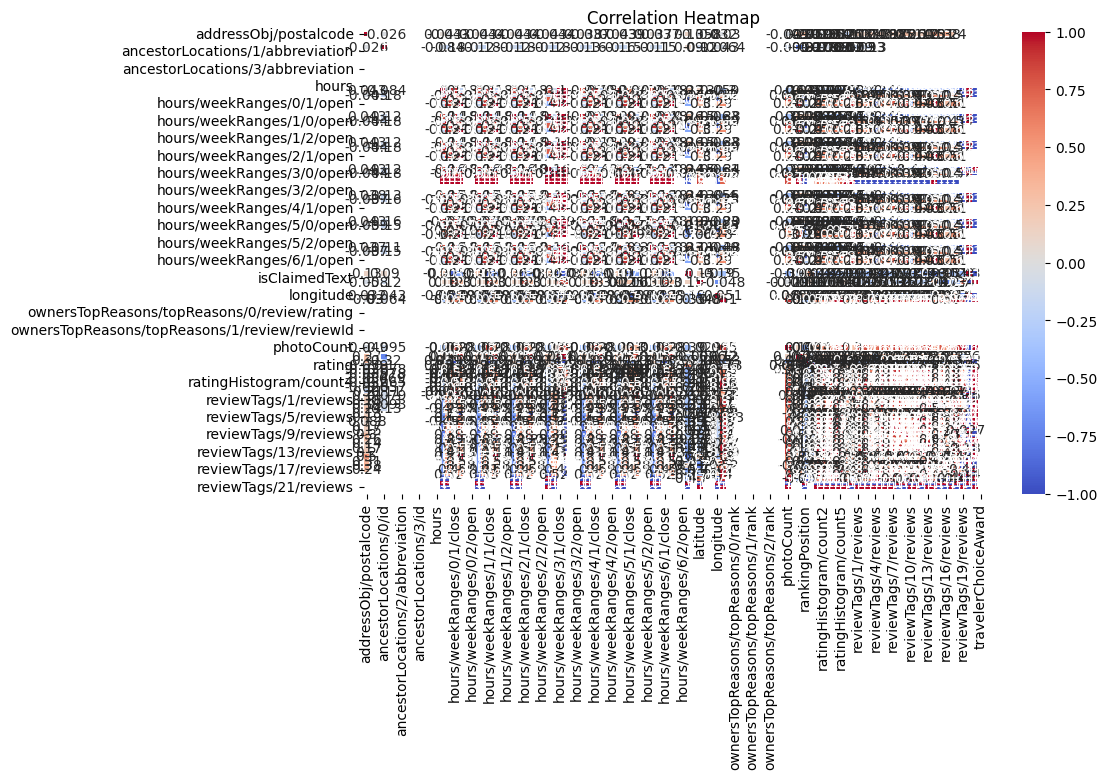

In [ ]:
# Correlation heatmap for numeric features
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Distribution plots for numerical features
numerical_cols = df.select_dtypes(include='number').columns
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

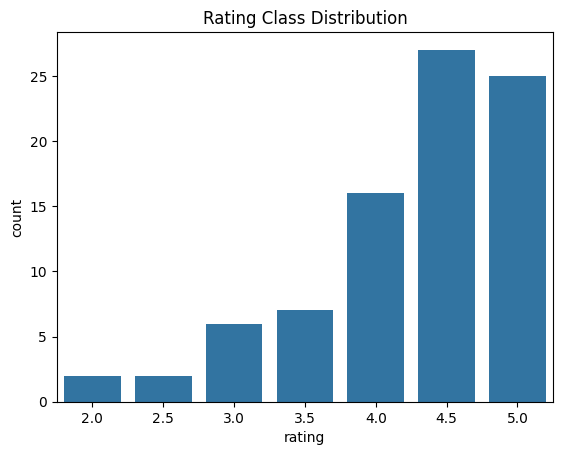

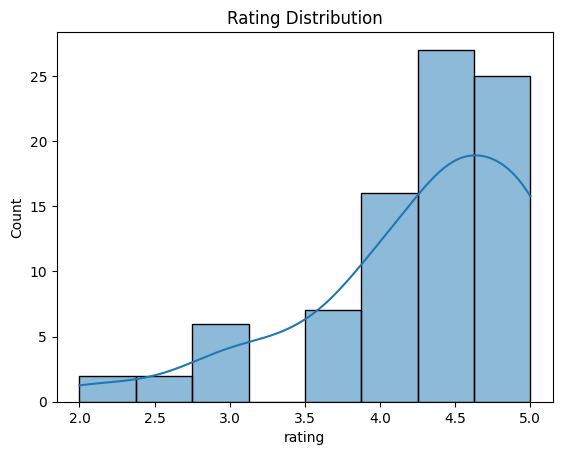

In [ ]:
# For classification
sns.countplot(x='rating', data=df)
plt.title('Rating Class Distribution')
plt.show()

# For regression (continuous ratings)
sns.histplot(df['rating'], kde=True)
plt.title('Rating Distribution')
plt.show()

In [ ]:
# Distribution plots for numerical features
numerical_cols = df.select_dtypes(include='number').columns # Recalculate numerical_cols based on the current df
for col in numerical_cols:
    if df[col].dtype in [np.int64, np.float64]:  # Ensure the column is numeric
        plt.figure(figsize=(8, 4))
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col}')
        plt.tight_layout()
        plt.show()
    else:
        print(f"Skipping column '{col}' as it is not numeric.") # This line will help to identify any unexpected non-numeric columns.

In [ ]:
constant_cols = [col for col in df.columns if df[col].nunique() <= 1]
print("Columns with constant or single unique values:", constant_cols)

Columns with constant or single unique values: ['addressObj/country', 'addressObj/state', 'ancestorLocations/0/abbreviation', 'ancestorLocations/0/subcategory', 'ancestorLocations/1/abbreviation', 'ancestorLocations/1/id', 'ancestorLocations/1/name', 'ancestorLocations/1/subcategory', 'ancestorLocations/2/abbreviation', 'ancestorLocations/2/id', 'ancestorLocations/2/name', 'ancestorLocations/2/subcategory', 'ancestorLocations/3/abbreviation', 'ancestorLocations/3/id', 'ancestorLocations/3/name', 'ancestorLocations/3/subcategory', 'category', 'cuisines/7', 'cuisines/8', 'cuisines/9', 'cuisines/10', 'cuisines/11', 'cuisines/12', 'cuisines/13', 'cuisines/14', 'cuisines/15', 'cuisines/16', 'cuisines/17', 'cuisines/18', 'cuisines/19', 'dietaryRestrictions/3', 'establishmentTypes/1', 'features/18', 'features/19', 'features/20', 'features/21', 'hours', 'hours/timezone', 'hours/weekRanges/0/2/close', 'hours/weekRanges/0/2/closeHours', 'hours/weekRanges/0/2/open', 'hours/weekRanges/0/2/openHour

In [ ]:
categorical_cols = df.select_dtypes(include='object').columns # Redefine categorical_cols
for col in categorical_cols:
    print(f"\nTop 5 categories in {col}:\n", df[col].value_counts().head())


Top 5 categories in address:
 address
Nuwara Eliya Sri Lanka                                             3
Grand Hotel Road, Nuwara Eliya 22200 Sri Lanka                     2
Peradeniya-Badulla-Chenkaladi Hwy, Nuwara Eliya 22200 Sri Lanka    2
18 Badulla Road, Nuwara Eliya 22200 Sri Lanka                      1
Nuwaraeliya Road, Talawakele 22100 Sri Lanka                       1
Name: count, dtype: int64

Top 5 categories in addressObj/city:
 addressObj/city
Nuwara Eliya    100
Ramboda           3
Ambewela          2
Talawakele        1
Nanu Oya          1
Name: count, dtype: int64

Top 5 categories in addressObj/country:
 addressObj/country
Sri Lanka    108
Name: count, dtype: int64

Top 5 categories in addressObj/street1:
 addressObj/street1
Badulla Road                         3
Grand Hotel Road                     3
Peradeniya-Badulla-Chenkaladi Hwy    2
PBC Hwy                              2
Badulla Rd                           2
Name: count, dtype: int64

Top 5 categories in ad

In [ ]:
print("\nCategorical Feature Cardinality:")
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")


Categorical Feature Cardinality:
address: 104 unique values
addressObj/city: 6 unique values
addressObj/country: 1 unique values
addressObj/street1: 96 unique values
addressObj/street2: 31 unique values
ancestorLocations/0/name: 6 unique values
ancestorLocations/0/subcategory: 1 unique values
ancestorLocations/1/name: 1 unique values
ancestorLocations/1/subcategory: 1 unique values
ancestorLocations/2/name: 1 unique values
ancestorLocations/2/subcategory: 1 unique values
category: 1 unique values
cuisines/0: 15 unique values
cuisines/1: 18 unique values
cuisines/2: 18 unique values
cuisines/3: 14 unique values
cuisines/4: 10 unique values
cuisines/5: 5 unique values
cuisines/6: 2 unique values
cuisines/7: 1 unique values
cuisines/8: 1 unique values
cuisines/9: 1 unique values
cuisines/10: 1 unique values
cuisines/11: 1 unique values
cuisines/12: 1 unique values
cuisines/13: 1 unique values
cuisines/14: 1 unique values
cuisines/15: 1 unique values
cuisines/16: 1 unique values
cuisines/

In [ ]:
# Check for object columns that might have numbers
for col in categorical_cols:
    try:
        df[col].astype(float)
        print(f"{col} contains numeric values as strings!")
    except:
        continue

ownersTopReasons/topReasons/0/isSearchTerm contains numeric values as strings!
ownersTopReasons/topReasons/1/isSearchTerm contains numeric values as strings!
ownersTopReasons/topReasons/2/isSearchTerm contains numeric values as strings!


In [ ]:
# Renaming Columns for Consistency: Replace '/' with '_'
# This step standardizes column names by replacing '/' with '_' to avoid issues in processing
df.columns = [col.strip().lower().replace(' ', '_').replace('/', '_') for col in df.columns]

# Append 'addressobj_postalcode' to 'address', separated by a comma, if the column exists
# This step checks if 'addressobj_postalcode' is in the dataframe
if 'addressobj_postalcode' in df.columns:
    # Combine 'address' and 'addressobj_postalcode', separating them with a comma if both are non-empty
    df['address'] = df.apply(
        lambda row: f"{row['address']}, {row['addressobj_postalcode']}" if pd.notna(row['addressobj_postalcode']) else row['address'], axis=1)
    # Drop the 'addressobj_postalcode' column after appending its data
    df = df.drop(columns=['addressobj_postalcode'])

# Combine 'addressobj_street2' into 'addressobj_street1' and rename it to 'addressobj_street'
# This step checks if 'addressobj_street2' is in the dataframe
if 'addressobj_street2' in df.columns and 'addressobj_street1' in df.columns:
    # Combine 'addressobj_street1' and 'addressobj_street2', separated by a comma if both are non-empty
    df['addressobj_street1'] = df.apply(
        lambda row: f"{row['addressobj_street1']}, {row['addressobj_street2']}" if pd.notna(row['addressobj_street2']) else row['addressobj_street1'], axis=1)
    # Rename 'addressobj_street1' to 'addressobj_street'
    df.rename(columns={'addressobj_street1': 'addressobj_street'}, inplace=True)
    # Drop the 'addressobj_street2' column after appending its data
    df = df.drop(columns=['addressobj_street2'])

# Function to combine multiple columns into one
def combine_columns(row, column_list):
    # Check if the column_list exists and has valid columns
    valid_columns = [col for col in column_list if col in row.index]

    if valid_columns:
        combined_value = ', '.join(row[valid_columns].dropna().astype(str)).strip()
        if combined_value:
            return combined_value

    return "unknown"

# Identify and merge grouped columns
categories = ['cuisines', 'dietaryrestrictions', 'dishes', 'features', 'mealtypes', 'establishmenttypes']
for category in categories:
    category_columns = [col for col in df.columns if col.startswith(f'{category}_')]

    if category_columns:
        df.loc[:, category] = df.apply(lambda row: combine_columns(row, category_columns), axis=1)
        df = df.drop(columns=category_columns, errors='ignore')  # `errors='ignore'` ensures safe column dropping

# Drop unnecessary columns
drop_columns = [col for col in df.columns if col.startswith(('photos_', 'hours_', 'orderonline_', 'ownerstopreasons', 'price_',
                                                             'ancestorlocations_', 'ratinghistogram_', 'reviewtags_'))]
df = df.drop(columns=drop_columns, errors='ignore')

# These columns are no longer needed in the dataset
columns_to_drop = ['hours', 'input', 'isclaimedicon', 'isclaimedtext', 'isclosed', 'islongclosed', 'image', 'isnearbyresult',
                   'addressobj_state', 'travelerchoiceaward', 'establishmenttypes', 'dishes',  'type', 'website',
                   'isnearbyresult', 'localaddress', 'localname', 'opennowtext', 'photocount', 'pricerange',
                   'id', 'locationstring','menuweburl', 'subcategories_0', 'addressobj_country',
                   'addressobj_street', 'addressobj_postalcode', 'rankingstring'
]
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

# Replace missing values with the appropriate message
def replace_missing_values(row, col):
    if pd.isna(row[col]):
        return "unknown"
    else:
        return row[col]

# Apply default message logic for missing values
default_message_columns = ['pricelevel', 'website']
for col in default_message_columns:
    if col in df.columns:
        df[col] = df.apply(lambda row: replace_missing_values(row, col), axis=1)

columns_to_replace = [
    'latitude', 'longitude', 'travelerchoiceaward', 'rankingdenominator', 'description',
    'rankingposition', 'rankingstring', 'rating', 'rawranking', 'phone', 'email'
]

# Replace missing values: text columns with 'not provided', numeric score columns with 0
for col in columns_to_replace:
    if col in df.columns:
      df[col] = df[col].fillna('unknown')

# Print final columns to verify
print(df.columns)
data = df.head()
display(data)

# Save the modified data to a new Excel file
# The preprocessed file contains standardized column names, a combined 'amenities' column,
# an updated 'address' column, and an updated 'addressobj_street' column
output_file = '/content/drive/My Drive/NuwaraEliya/PreprocessedRestaurantsNuwaraEliya.csv'
df.to_csv(output_file, index=False)

print(f"Preprocessing complete. Cleaned data saved to '{output_file}'")

Index(['address', 'addressobj_city', 'category', 'description', 'email',
       'latitude', 'longitude', 'name', 'numberofreviews', 'phone',
       'pricelevel', 'rankingdenominator', 'rankingposition', 'rating',
       'rawranking', 'weburl', 'cuisines', 'dietaryrestrictions', 'features',
       'mealtypes'],
      dtype='object')


,address,addressobj_city,category,description,email,latitude,longitude,name,numberofreviews,phone,pricelevel,rankingdenominator,rankingposition,rating,rawranking,weburl,cuisines,dietaryrestrictions,features,mealtypes
0,"18 Badulla Road, Nuwara Eliya 22200 Sri Lanka,...",Nuwara Eliya,restaurant,unknown,unknown,6.956621,80.77682,Indian Summer Restaurant,4,+94 52 2 224511,$$ - $$$,87.0,59.0,4.0,3.067908,https://www.tripadvisor.com/Restaurant_Review-...,unknown,unknown,unknown,"Lunch, Dinner"
1,"158, Kandy Road, Nuwara Eliya 22220 Sri Lanka,...",Nuwara Eliya,restaurant,unknown,unknown,6.97488,80.76336,Pizza Hut,28,+94 11 7 729729,$$ - $$$,101.0,72.0,3.0,3.021859,https://www.tripadvisor.com/Restaurant_Review-...,"Italian, Pizza, Fast Food",Vegetarian friendly,"Delivery, Takeout",unknown
2,"20 Kandy Road, Nuwara Eliya 22200 Sri Lanka, 2...",Nuwara Eliya,restaurant,unknown,unknown,6.974394,80.76689,The Pub,159,+94 52 2 235788,$$ - $$$,87.0,56.0,3.0,3.074628,https://www.tripadvisor.com/Restaurant_Review-...,"Bar, Pub",unknown,"Takeout, Seating, Television, Serves Alcohol, ...","Lunch, Dinner"
3,"405 Kandy Road Bambarakale, Nuwaraeliya, Nuwar...",Nuwara Eliya,restaurant,Located on the second floor. Enjoy the beautif...,info@midkyhotels.com,6.97809,80.75889,Midky Restaurant,0,+94 77 730 9601,$,unknown,unknown,unknown,unknown,https://www.tripadvisor.com/Restaurant_Review-...,"Italian, Chinese, Indian, Asian, Sri Lankan, A...",unknown,"Takeout, Reservations, Outdoor Seating, Seatin...","Breakfast, Lunch, Dinner"
4,"Nuwaraeliya Road, Talawakele 22100 Sri Lanka, ...",Talawakele,restaurant,unknown,unknown,6.933452,80.66997,Kochchi Family Restaurant,0,+94 77 718 7511,unknown,unknown,unknown,unknown,unknown,https://www.tripadvisor.com/Restaurant_Review-...,"Asian, Sri Lankan",unknown,unknown,unknown


Preprocessing complete. Cleaned data saved to '/content/drive/My Drive/NuwaraEliya/PreprocessedRestaurantsNuwaraEliya.csv'


In [ ]:
import pandas as pd
import os
import glob

# List of folder paths where the CSVs are stored
folders = [
    "/content/drive/My Drive/NuwaraEliya",
    "/content/drive/My Drive/Ella",
    "/content/drive/My Drive/Kandy",
    "/content/drive/My Drive/Colombo"
]

# Initialize an empty list to store DataFrames
dataframes = []

# Iterate over each folder and read only CSV files that contain "Preprocessed" in their filename
for folder in folders:
    csv_files = glob.glob(os.path.join(folder, "PreprocessedRestaurants*.csv"))  # Filter files with "Preprocessed" in name

    for file in csv_files:
        df = pd.read_csv(file)  # Read CSV
        dataframes.append(df)   # Append DataFrame to the list

# Concatenate all DataFrames into a single one
merged_df = pd.concat(dataframes, ignore_index=True)

# Save the merged DataFrame as a CSV
merged_df.to_csv("/content/drive/My Drive/Colombo/PreprocessedMergedRestaurants.csv", index=False)

print("Merged CSV saved as merged_output.csv")

Merged CSV saved as merged_output.csv


In [ ]:
import pandas as pd

# Load the merged CSV file
file_path = '/content/drive/My Drive/Colombo/PreprocessedMergedRestaurants.csv'
df = pd.read_csv(file_path)

# Count the number of unknown values in each column
unknown_counts = df.apply(lambda col: (col.astype(str).str.lower() == 'unknown').sum())

print(unknown_counts)

address                  0
addressobj_city          0
category                 0
description            320
email                  271
latitude                22
longitude               22
name                     0
numberofreviews          0
phone                   34
pricelevel             126
rankingdenominator      31
rankingposition         31
rating                  31
rawranking              31
weburl                   0
cuisines                41
dietaryrestrictions    353
features               135
mealtypes              100
dtype: int64


In [ ]:
# Replace "unknown" values with median for specific columns
median_columns = ["rating", "rawranking"]
for col in median_columns:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric
        median_value = df[col].median(skipna=True)  # Compute median ignoring NaNs
        df[col] = df[col].fillna(median_value)  # Assign filled column back to df

# Replace "unknown" values in "pricerange" with "$$"
# NOTE: Changed 'pricelevel' to 'pricerange' as 'pricelevel' was dropped earlier
if "pricerange" in df.columns:
    df["pricerange"] = df["pricerange"].apply(lambda x: "$$" if str(x).lower() == 'unknown' else x)

# Convert "rankingdenominator" and "rankingposition" to numeric and replace unknowns with mode
mode_columns = ["rankingposition", "rankingdenominator"]
for col in mode_columns:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric
        mode_value = df[col].mode(dropna=True)  # Get mode
        if not mode_value.empty:  # Ensure mode exists
            df[col] = df[col].fillna(mode_value[0])  # Fill NaNs with mode

# Replace "unknown" values with "unspecified" for specific columns
unspecified_columns = ["dietaryrestrictions", "features", "mealtypes", "phone", "email", "description"]
for col in unspecified_columns:
    if col in df.columns:
        df[col] = df[col].apply(lambda x: "unspecified" if str(x).lower() == 'unknown' else x)

# Drop rows where "cuisines" column is unknown
if "cuisines" in df.columns:
    df = df[df["cuisines"].str.lower() != "unknown"]

# Define a function to convert price level to LKR
def convert_price_to_lkr(price):
    if price == "$":
        return 300
    elif price == "$$":
        return 600
    elif price == "$$$":
        return 900
    elif price == "$$$$":
        return 1200
    elif price == "$$ - $$$":
        return (600 + 900) // 2  # Average of $$ and $$$
    elif price == "$$$ - $$$$":
        return (900 + 1200) // 2  # Average of $$$ and $$$$
    else:
        return None  # Keep as NaN if price level is unspecified


# Convert pricerange to LKR and create a new column 'pricelevel_lkr'
# NOTE: Changed 'pricelevel' to 'pricerange' and created a new column
if "pricerange" in df.columns:
    df["pricelevel_lkr"] = df["pricerange"].apply(convert_price_to_lkr)

# Drop original pricerange column if it exists
if "pricerange" in df.columns:
    df.drop(columns=["pricerange"], inplace=True)

# Replace categorical "unspecified" values first
df.replace("unspecified", pd.NA, inplace=True)

# Now, fill NaN values with meaningful defaults
df.loc[:, "dietaryrestrictions"] = df["dietaryrestrictions"].fillna("No Special Dietary")
df.loc[:, "features"] = df["features"].fillna("Basic")
df.loc[:, "mealtypes"] = df["mealtypes"].fillna("General")
df.loc[:, "email"] = df["email"].fillna("no email")
df.loc[:, "phone"] = df["phone"].fillna("no phone")
df.loc[:, "description"] = df["description"].fillna("No description provided")
df.loc[:, "latitude"] = df["latitude"].fillna("no latitude")
df.loc[:, "longitude"] = df["longitude"].fillna("no longitude")

# Save the final cleaned data to a new file
final_cleaned_file_path = "/content/drive/My Drive/Colombo/FinalPreprocessedMergedRestaurants.csv"
df.to_csv(final_cleaned_file_path, index=False)

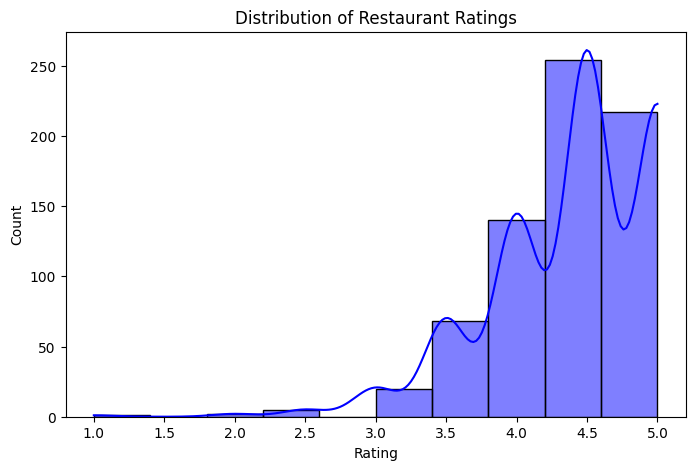

,Unique Count
category,1
cuisines,400
dietaryrestrictions,14
features,464
mealtypes,37


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the merged CSV file
file_path = '/content/drive/My Drive/Colombo/FinalPreprocessedMergedRestaurants.csv'
df = pd.read_csv(file_path)

# Count unique values in categorical columns
categorical_columns = ["category", "cuisines", "dietaryrestrictions", "features", "mealtypes"]
unique_counts = {col: df[col].nunique() for col in categorical_columns}

# Visualizing distribution of restaurant ratings
plt.figure(figsize=(8, 5))
sns.histplot(df["rating"], bins=10, kde=True, color="blue")
plt.title("Distribution of Restaurant Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

# Display unique counts of categorical columns
unique_counts_df = pd.DataFrame.from_dict(unique_counts, orient="index", columns=["Unique Count"])
display(unique_counts_df)

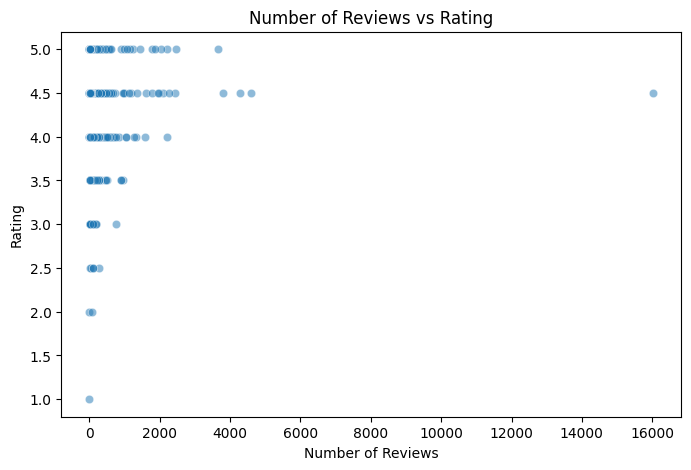

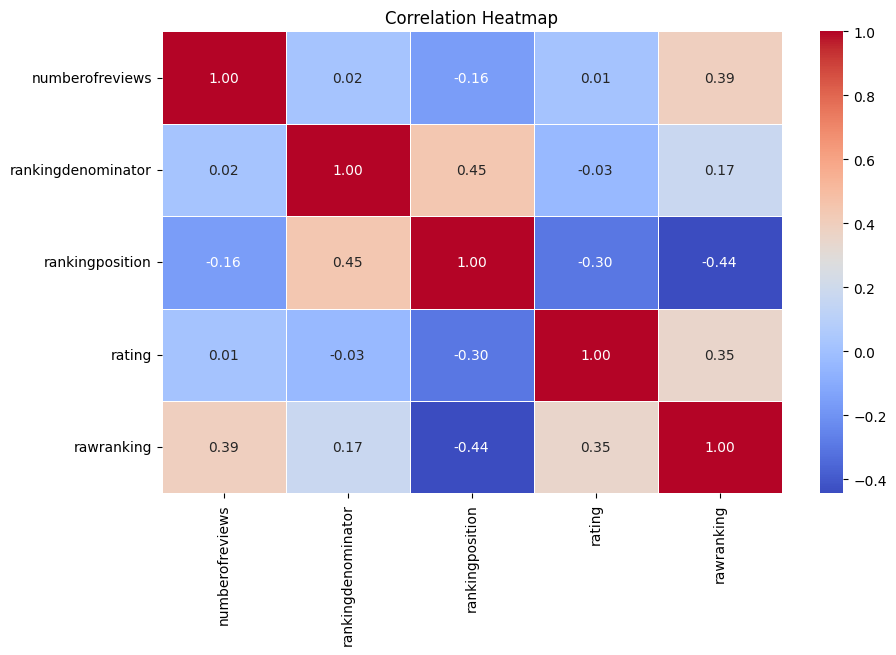

In [ ]:
# Relationship between number of reviews and rating
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["numberofreviews"], y=df["rating"], alpha=0.5)
plt.title("Number of Reviews vs Rating")
plt.xlabel("Number of Reviews")
plt.ylabel("Rating")
plt.show()

# Correlation heatmap of numerical variables
numerical_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(10, 6))
sns.heatmap(numerical_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()